# Make crops, not war

# Table of Contents
<div class="toc"><ul class="toc-item">

<li><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1">Data Wrangling</a></li>
    <ul ><li><a href="#Size" data-toc-modified-id="Data-Wrangling-1.1">Size</a></li>
                        <ul>
                            <li><a href="#Wars-Datasets" data-toc-modified-id="Data-Wrangling-1.1.1">Wars Datasets</a></li>
                            <li><a href="#Agriculture-and-Food-Datasets" data-toc-modified-id="Data-Wrangling-1.1.2">Agriculture and Food Datasets</a></li></ul>
                      <li><a href="#Formats" data-toc-modified-id="Data-Exploration-1.2">Format</a></li>
                        <ul>
                            <li><a href="#Wars" data-toc-modified-id="Data-Exploration-1.2.1">Wars Datasets</a></li>
                            <li><a href="#Agriculture-and-Food-Datasets" data-toc-modified-id="Data-Exploration-1.2.2">Agriculture and Food Datasets</a></li></ul>
                      <li><a href="#Missing-values" data-toc-modified-id="Data-Exploration-1.3">Missing values</a></li>
                        <ul>
                            <li><a href="#Wars" data-toc-modified-id="Data-Exploration-1.3.1">Wars Datasets</a></li>
                            <li><a href="#Food-Related" data-toc-modified-id="Data-Exploration-1.3.2">Agriculture and Food Datasets</a></li></ul>
    </ul>
 <li><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1">Data Exploration</a></li>
    <ul ><li><a href="#Distributions" data-toc-modified-id="Data-Exploration-1.1">Distributions</a></li>
                        <ul type="circle"><li>War</li><li>Agriculture</li></ul>
                      <li><a href="#Correlations" data-toc-modified-id="Data-Exploration-1.2">Correlations</a></li>
    </ul>   
<li>Our project</li>
    </ul> </div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

%matplotlib inline

sns.set_style('whitegrid')

# add time converter for matplotlib visualisation
pd.plotting.register_matplotlib_converters()

# Data Wrangling

## Size

### Wars Datasets

For the data on wars, we are going to use data obtained from **[Wikidata Query Service](https://query.wikidata.org/)**. As we selected only the data in which we are interested in, the **dataset is quite small** as we can see below:

In [2]:
# Set folder name
wikipedia_path = 'data/wikipedia/'

# Set filenames
state_in_war_file = 'states.json'
political_in_war_file = 'political.json'
terroristic_in_war_file = 'terroristic.json'

# Read the files
wars_states_df = pd.read_json(wikipedia_path + state_in_war_file, orient='records', encoding='utf-8')
wars_political_df = pd.read_json(wikipedia_path + political_in_war_file, orient='records', encoding='utf-8')
wars_terroristic_df = pd.read_json(wikipedia_path + terroristic_in_war_file, orient='records', encoding='utf-8')

For now, we are not interested in the **differences** between these three categories, but only between **state and non-state actors**. We therefore only mark whether a participant is state or non-state. Next we stack the dataframes to create a unique one.

In [3]:
# Mark the elements of the DFs as either state or non-state actors
wars_states_df['is_state'] = True
wars_political_df['is_state'] = False
wars_terroristic_df['is_state'] = False

# Stack the dataframes
raw_wars_df = wars_states_df.append(wars_political_df, sort=True).append(wars_terroristic_df, sort=True)

# Rename the columns to a more readable style
renamed_wars_df = raw_wars_df.rename(columns={
    'armed_conflictLabel': 'name',
    'participantLabel': 'participant',
    'countryWarLabel': 'country',
    'locationLabel': 'location'
})

print(f"Length of wars dataframe: {renamed_wars_df.size}")

Length of wars dataframe: 7665


The dataframe can be kept in memory.

### Agriculture and Food Datasets

For food-related data, we are using data from **[FAOSTAT](http://www.fao.org/faostat/en/#data) website**. Here we can query FAO database as well and can download only the datasets we need. Particularly, we are interested in the following datasets:

- [Crops](http://www.fao.org/faostat/en/#data/QC)
- [Live Animals](http://www.fao.org/faostat/en/#data/QA)
- [Annual Population](http://www.fao.org/faostat/en/#data/OA)
- [Land Use](http://www.fao.org/faostat/en/#data/RL)

These **datasets are quite small** and can be kept in memory.

In [4]:
# Set folder name
fao_path = 'data/fao/'

# Set filenames
crops_production_file = 'crops_production.csv'
livestock_production_file = 'livestock_production.csv'
population_file = 'population.csv'
land_use_file = 'land_use.csv'

# Read the files
raw_crops_production_df = pd.read_csv(fao_path + crops_production_file, encoding='latin-1')
raw_livestock_production_df = pd.read_csv(fao_path + livestock_production_file, encoding='latin-1')
raw_population_df = pd.read_csv(fao_path + population_file, encoding='latin-1')
raw_land_use_df = pd.read_csv(fao_path + land_use_file, encoding='latin-1')

# Create an array with the names to iterate over the dataframes
agricultural_dfs_names = ['crops', 'livestock', 'population', 'land']

# Create an array of dataframes to easily iterate over them
agricultural_dfs = [
    raw_crops_production_df,
    raw_livestock_production_df,
    raw_population_df,
    raw_land_use_df
]

# Iterate over names and dataframes to print the size
for name, df in zip(agricultural_dfs_names, agricultural_dfs):
    print(f"Length of {name} dataframe: {df.size}")

Length of crops dataframe: 1437366
Length of livestock dataframe: 472752
Length of population dataframe: 223725
Length of land dataframe: 170100


All these datasets can be easily handled by a laptop.

## Formats

### Wars

Now, let us **check the types** of the columns of the dataframes:

In [5]:
renamed_wars_df.dtypes

name            object
country         object
end_year       float64
is_state          bool
location        object
participant     object
start_year       int64
dtype: object

The other two war dataframes have the same formats. We can see that the years have different types. It can be useful to convert them to `datetime` years. We are doing it after dealing with missing values.

### Agriculture and Food Datasets

In [6]:
for name, df in zip(agricultural_dfs_names, agricultural_dfs):
    print(f"Types in {name} dataframe:\n {df.dtypes}\n")

Types in crops dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

Types in livestock dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

Types in population dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area        

## Missing values

### Wars

Let us check whether there are missing values in the wars dataframe:

In [7]:
print("Number of wars with missing data: " + 
      str(renamed_wars_df[renamed_wars_df.isnull().any(axis=1)].groupby('name').count().shape[0]))

print("Columns with missing data:")
renamed_wars_df.columns[renamed_wars_df.isnull().any()].tolist()

Number of wars with missing data: 35
Columns with missing data:


['country', 'end_year', 'location']

#### Missing end year

Let us check which entries have missing end year:

In [8]:
missing_end_year_wars = (
    # Get the lines missing `end_year`
    renamed_wars_df
        .loc[
            # Get the rows missing end year
            renamed_wars_df['end_year'].isnull(),
            # Select the name and start year
            ['name', 'start_year']
        ]
        # Remove duplicates
        .drop_duplicates()
)

missing_end_year_wars

name  start_year
46                    Shelling of Yeonpyeong        2010
82                          Cabinda Conflict        1975
86                War in North-West Pakistan        2004
90                           Darfur conflict        2003
170                 Kurdish–Turkish conflict        2015
193                            Kivu conflict        2004
304                          Kachin conflict        1961
331                           War in Donbass        2014
348           Iraqi Civil War (2014–present)        2014
352               War in Afghanistan (2015–)        2015
360                 Libyan civil war (2014–)        2014
365  Saudi Arabian-led intervention in Yemen        2015
389                         Manbij offensive        2016
390                         Aleppo offensive        2016
713                            War on Terror        2001
739        Lord's Resistance Army insurgency        1987
743        Insurgency in the Maghreb (2002–)        2002
773                     Gaza–Israel conflict        2006
775               Iran–Israel proxy conflict        2005

Among these wars, only the [Shelling of Yeonpyeong](https://en.wikipedia.org/wiki/Bombardment_of_Yeonpyeong) has come to an end (it has actually a one-day event). All the others are still conflicts which are still ongoing (even the older ones). As a matter of fact, due to how the Wikidata query is made, the wars without an **end date** have not finished yet. Hence, we can fill the value with the last year in FAO dataset, which is 2017:

In [9]:
from datetime import datetime

# Set end year of Shelling of Yeonpyeong to 2010
renamed_wars_df.loc[renamed_wars_df['name'] == 'Shelling of Yeonpyeong', 'end_year'] = 2010

# Set the current year for the other wars which are ongoing
renamed_wars_df.loc[renamed_wars_df['end_year'].isnull(), 'end_year'] = 2017

In [10]:
# Change start year and end year to datetime objects
renamed_wars_df['start_year'] = pd.to_datetime(renamed_wars_df['start_year'], format='%Y')
renamed_wars_df['end_year'] = pd.to_datetime(renamed_wars_df['end_year'].astype(int), format='%Y')

Now, let us see check how many wars are missing the **country** where the war took place:

In [11]:
print("Number of wars with missing country: " + 
      str(renamed_wars_df.loc[renamed_wars_df['country'].isnull(), 'name'].drop_duplicates().shape[0]))

Number of wars with missing country: 21


As there are few, we can fill the country manually, and since we are not interested in the precise location of the wars, we can drop the column location.

In [12]:
# Show the unique wars with missing cou
renamed_wars_df.loc[renamed_wars_df['country'].isnull(), ['name', 'country', 'location']].drop_duplicates()

name country  \
702                  Soviet–Afghan War     NaN   
703                      Tet Offensive     NaN   
713                      War on Terror     NaN   
719                         Kosovo War     NaN   
739  Lord's Resistance Army insurgency     NaN   
743  Insurgency in the Maghreb (2002–)     NaN   
745                Sino-Vietnamese War     NaN   
754                Cambodian Civil War     NaN   
757                Cambodian Civil War     NaN   
762                    First Congo War     NaN   
767                Libyan–Egyptian War     NaN   
769                       Paquisha War     NaN   
771   1982 Ethiopian–Somali Border War     NaN   
772               Djiboutian Civil War     NaN   
773               Gaza–Israel conflict     NaN   
775         Iran–Israel proxy conflict     NaN   
776               Tell Abyad offensive     NaN   
778                        Vietnam War     NaN   
791                        Six-Day War     NaN   
797                        Ceneps Guar     NaN   
798           Second Kurdish–Iraqi War     NaN   
100                   2006 Lebanon War     NaN   

                               location  
702  Democratic Republic of Afghanistan  
703                       South Vietnam  
713                                 NaN  
719                              Kosovo  
739                                 NaN  
743                             Maghreb  
745                       North Vietnam  
754                      Khmer Republic  
757                 Kingdom of Cambodia  
762                               Zaire  
767                                 NaN  
769                                 NaN  
771                                 NaN  
772                                 NaN  
773                                 NaN  
775                         Middle East  
776                                 NaN  
778                       South Vietnam  
791                         Middle East  
797                                 NaN  
798                                 NaN  
100                              Levant

In [13]:
non_null_wars_df = renamed_wars_df.copy()

# Fix missing country
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tet Offensive', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Kosovo War', 'country'] = 'Kosovo'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Soviet–Afghan War', 'country'] = 'Afghanistan'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Cambodian Civil War', 'country'] = 'Cambodia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'First Congo War', 'country'] = 'Democratic Republic of the Congo'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Djiboutian Civil War', 'country'] = 'Djibouti'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Libyan–Egyptian War', 'country'] = 'Libya,Egypt'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Paquisha War', 'country'] = 'Ecuador,Peru'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Sino-Vietnamese War', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == '1982 Ethiopian–Somali Border War', 'country'] = 'Somalia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Ceneps Guar', 'country'] = 'Ecuador,Peru'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Second Kurdish–Iraqi War', 'country'] = 'Iraq'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Vietnam War', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Six-Day War', 'country'] = 'Israel,Egypt,Palestine,Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tell Abyad offensive', 'country'] = 'Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == '2006 Lebanon War', 'country'] = 'Lebanon,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel clashes (May 2019)', 'country'] = 'Israel,Palestine'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tell Abyad offensive', 'country'] = 'Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == '2006 Lebanon War', 'country'] = 'Lebanon,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel clashes (May 2019)', 'country'] = 'Israel,Palestine'
non_null_wars_df.loc[non_null_wars_df['name'] == '2003 invasion of Iraq', 'country'] = 'Iraq'
non_null_wars_df.loc[non_null_wars_df['name'] == '2014 Israel–Gaza conflict', 'country'] = 'Palestine,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == '2018–19 Gaza border protests', 'country'] = 'Palestine,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Croatian War of Independence', 'country'] = 'Croatia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel conflict', 'country'] = 'Palestine, Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Insurgency in the Maghreb (2002–)', 'country'] = '''
    Algeria,Libya,Mauritania,Morocco,Tunisia,Western Sahara'''
non_null_wars_df.loc[non_null_wars_df['name'] == "Lord's Resistance Army insurgency", 'country'] = '''
    Uganda,South Sudan,Democratic Republic of the Congo,Central African Republic'''

# Eplode entries with multiple locations
non_null_wars_df['country'] = non_null_wars_df['country'].str.split(',')
exploded_wars_df = non_null_wars_df.reset_index().explode('country').drop('index', axis=1)

# Remove dangling spaces which are left
stripped_wars_df = exploded_wars_df.copy()
stripped_wars_df['country'] = exploded_wars_df['country'].str.strip()

Let us see what is left:

In [14]:
stripped_wars_df[stripped_wars_df['country'].isnull()]

name country   end_year  is_state     location  \
713                War on Terror     NaN 2017-01-01      True          NaN   
714                War on Terror     NaN 2017-01-01      True          NaN   
715                War on Terror     NaN 2017-01-01      True          NaN   
716                War on Terror     NaN 2017-01-01      True          NaN   
717                War on Terror     NaN 2017-01-01      True          NaN   
718                War on Terror     NaN 2017-01-01      True          NaN   
775   Iran–Israel proxy conflict     NaN 2017-01-01      True  Middle East   
777   Iran–Israel proxy conflict     NaN 2017-01-01      True  Middle East   
803                War on Terror     NaN 2017-01-01     False          NaN   
804                War on Terror     NaN 2017-01-01     False          NaN   
805                War on Terror     NaN 2017-01-01     False          NaN   
1064               War on Terror     NaN 2017-01-01     False          NaN   
1065               War on Terror     NaN 2017-01-01     False          NaN   
1066               War on Terror     NaN 2017-01-01     False          NaN   

                               participant start_year  
713             People's Republic of China 2001-01-01  
714                                 France 2001-01-01  
715   Islamic State of Iraq and the Levant 2001-01-01  
716                                 Russia 2001-01-01  
717                         United Kingdom 2001-01-01  
718               United States of America 2001-01-01  
775                                 Israel 2005-01-01  
777                                   Iran 2005-01-01  
803                Turkistan Islamic Party 2001-01-01  
804                                Taliban 2001-01-01  
805   Islamic State of Iraq and the Levant 2001-01-01  
1064               Turkistan Islamic Party 2001-01-01  
1065                               Taliban 2001-01-01  
1066  Islamic State of Iraq and the Levant 2001-01-01

Since the [War on Terror](https://en.wikipedia.org/wiki/War_on_Terror) and Iran-Israel proxy conflict can be considered as a series of wars, and has no defined location, we drop them.

In [15]:
final_wars_df = stripped_wars_df[(stripped_wars_df['name'] != 'War on Terror') & (stripped_wars_df['name'] != 'Iran–Israel proxy conflict')]

print("Number of wars with missing country: " + 
      str(final_wars_df.loc[final_wars_df['country'].isnull(), 'name'].drop_duplicates().shape[0]))

Number of wars with missing country: 0


### Food Related

Let us first see the different unique in the features, in order to decide if we can drop them:

In [16]:
raw_crops_production_df.groupby('Flag').count()

Domain Code  Domain  Area Code    Area  Element Code  Element  \
Flag                                                                  
A          102669  102669     102669  102669        102669   102669   

      Item Code    Item  Year Code    Year    Unit   Value  Flag Description  
Flag                                                                          
A        102669  102669     102669  102669  102669  100483            102669

In [17]:
raw_crops_production_df.groupby('Unit').count()

Domain Code  Domain  Area Code    Area  Element Code  Element  \
Unit                                                                    
tonnes       102669  102669     102669  102669        102669   102669   

        Item Code    Item  Year Code    Year   Value    Flag  Flag Description  
Unit                                                                            
tonnes     102669  102669     102669  102669  100483  102669            102669

In [18]:
raw_crops_production_df.groupby('Element').count()

Domain Code  Domain  Area Code    Area  Element Code  Item Code  \
Element                                                                       
Production       102669  102669     102669  102669        102669     102669   

              Item  Year Code    Year    Unit   Value    Flag  \
Element                                                         
Production  102669     102669  102669  102669  100483  102669   

            Flag Description  
Element                       
Production            102669

In [19]:
raw_crops_production_df.groupby('Domain').count()

Domain Code  Area Code    Area  Element Code  Element  Item Code  \
Domain                                                                     
Crops        102669     102669  102669        102669   102669     102669   

          Item  Year Code    Year    Unit   Value    Flag  Flag Description  
Domain                                                                       
Crops   102669     102669  102669  102669  100483  102669            102669

Since we have only **one value** for those columns, we can drop them. We just need to keep in mind that the unit used is **tonnes**. Let us **drop useless columns**, and rename the remaing ones to be more consistent with the wars dataframe naming.

In [20]:
def drop_useless_columns(fao_df):

    # Keep only useful columns
    fao_df = fao_df[['Area', 'Item', 'Year', 'Value']]
    
    fao_df = fao_df.rename(columns={
        'Area': 'country',
        'Item': 'item',
        'Year': 'year',
        'Value': 'value'
    })
    
    # Convert the year to a datetime object
    fao_df['year'] = pd.to_datetime(fao_df['year'], format='%Y')
    
    return fao_df

dropped_agricultural_dfs = list(map(drop_useless_columns, agricultural_dfs))

Now, let us see if there are missing values:

In [21]:
for name, df in zip(agricultural_dfs_names, dropped_agricultural_dfs):
    print("In the {name} dataset there are {missing} missing values.".format(
        name=name,
        missing=df[df.isnull().any(axis=1)].size
    ))

# Saving the clean versions of the agricultural dfs
final_crop_df, final_livestock_df, final_population_df, final_land_df = dropped_agricultural_dfs

In the crops dataset there are 8744 missing values.
In the livestock dataset there are 1512 missing values.
In the population dataset there are 0 missing values.
In the land dataset there are 0 missing values.


We can see that many values are missing. However, since we are going to aggregate the data, we assume that the impact of missing data will be *low*. Moreover, we will need to know in which years we are missing data, in order to weight better the averages we are going to compute. When *we will need more specific data* about some particular countries, we will decide how to handle the problem in a more elaborate way.

# Data Exploration

## Distributions

Let us plot the following distributions to further explore our datasets:

- The number of years each country is in the war
- The total crop production of all countries changing during the whole time of observation (1961-2017)
- The total amount of livestock of all countries changing during the whole time of observation
- The total area of agricultural land of all countries changing during the whole time of observation
- The total human population changing during the whole time of observation

#### War-related

Let us start with the **number of years in which a country had a war**. In order to do this, we first have to **avoid that wars overlap in years**. For instance, if a country had two wars, one from 1955 to 1970, and another one from 1965 to 1971, we do not want the years from 1965 to 1970 to be counted twice.

We accomplish this by first creating a new column containing all the years of each war, next we explode the column such that we have one row per each year a country had in a specifi war. We finally take in consideration only the country and the years and remove the (overlapping) duplicates.

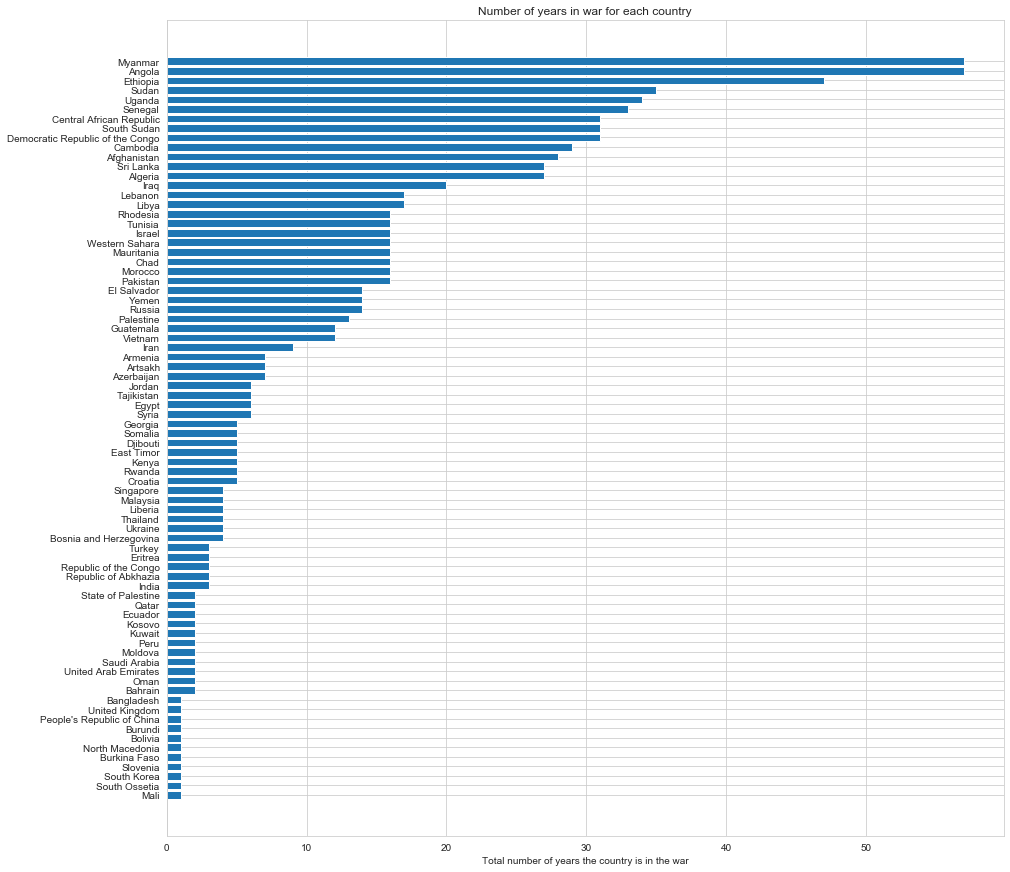

In [34]:
# Create a df that only contains the wars, the time ranges and the locations
country_wars_df = final_wars_df[['country', 'name', 'start_year', 'end_year']].drop_duplicates()

# Create a new column, range, in which we have all the years in which a country had a war
country_wars_df['years'] = country_wars_df.apply(
    # Create a range from the first to the last year of war (we want the last year to be taken in account)
    lambda row: list(range(row['start_year'].year, row['end_year'].year + 1)),
    axis=1
)

unique_years_df = (
    country_wars_df
        # Explode the years lists and take in consideration only country and years
        .explode('years')[['country', 'years']]
        # Remove overlapping years (which are duplicate (country, year) couples)
        .drop_duplicates()
        # Reset index after explode and drop newly created index column
        .reset_index()
        .drop('index', axis=1)
)

# Group by country to count the number of years in war the country had and sort
years_per_country = unique_years_df.groupby('country').count().sort_values(by='years').reset_index()

# Finally plot
plt.figure(figsize=(15,15))
plt.grid(True)
plt.barh(years_per_country['country'], years_per_country['years'])
plt.title('Number of years in war for each country')
_ = plt.xlabel('Total number of years the country is in the war')

We can easily see that luckily many countries did not have a war (e.g. European countries); some of them, on the other hand, have been in war for all the 57 years of observations.

But are long wars more or less common than short ones? Let us plot an histogram to make it clearer.

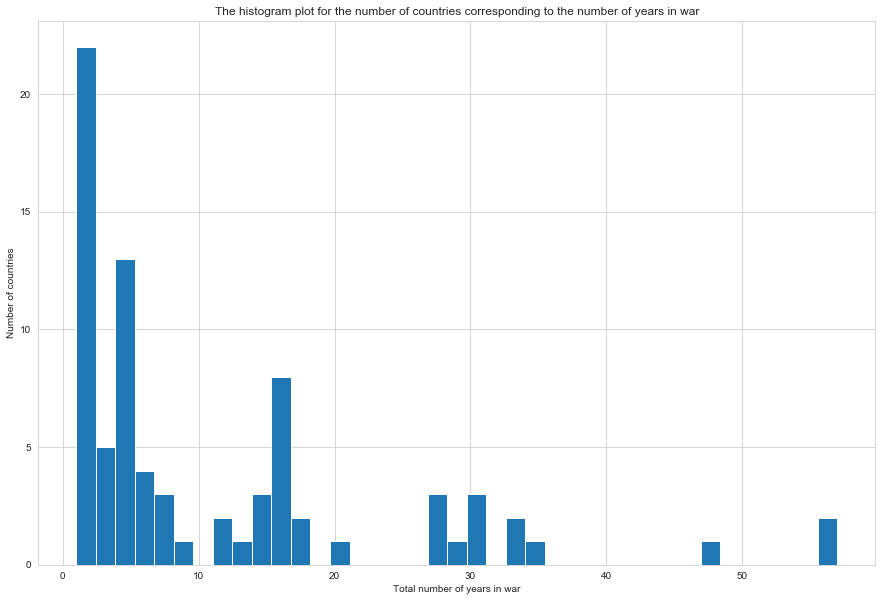

In [35]:
f, ax = plt.subplots(figsize=(15,10))
ax.hist(years_per_country['years'], bins=years_per_country.shape[0] // 2)
ax.set_title('The histogram plot for the number of countries corresponding to the number of years in war')
ax.set_xlabel('Total number of years in war')
_ = ax.set_ylabel('Number of countries')

Luckily enough, we can consider long wars quite exceptional.

#### Agriculture-related

Next, we want to plot the **total production of the crops per year and per country**, as an overall, general trend. In addition, we plot **similar** figures for the total amount of livestock for all countries, total agricultural area and total population, each per year and per country.

Before doing that let us check if the total periods of observation for each country are the same in order to exclude wrong interpretation of the data.

In [36]:
def sum_total_yearly_quantity(df):
    # Group by country and year, and sum the quantity up
    return  (
        df.groupby(['country', 'year'])
            .sum()
            .reset_index()
    )


# Sum the total production in all the datasets
total_productions_per_year_per_country = list(map(sum_total_yearly_quantity, dropped_agricultural_dfs))

# Unpack the list to individual dataframes
crop_per_year_per_country, \
livestock_per_year_per_country, \
population_per_year_per_country, \
land_per_year_per_country = total_productions_per_year_per_country

In [37]:
for name, df in zip(agricultural_dfs_names, total_productions_per_year_per_country):
    
    # Unique values in the total period of observations
    years_of_observations = df.groupby('country').count()['year'].unique()
    
    # Check if there is only one unique period (57 years) that corresponds to each country
    print('Years of observations for {} are the same for all countries: {}'.format(name, len(years_of_observations) == 1))

Years of observations for crops are the same for all countries: False
Years of observations for livestock are the same for all countries: False
Years of observations for population are the same for all countries: False
Years of observations for land are the same for all countries: False


As we can see, different countries have different years of collecting the data, let us show an example for the crop production.

In [38]:
# Get the unique numbers of monitored years
crop_years_observation = crop_per_year_per_country.groupby('country').count()['year'].unique()

crop_years_observation

array([57, 26, 18, 39, 55, 52, 25, 32, 24, 27, 12, 30, 31, 14,  6, 51, 29,
       50], dtype=int64)

`crop_years_observation` array represents the different periods of times in which the country collected the crop production data. We see that some countries made observations for **57** years, but some countries observed for **26**, **18**, etc years. This should affect the interpretation of the total crop production of all countries per year. 

Let us see have a quick glance at which countries collected data for a smaller period of time.

In [39]:
counted_data = crop_per_year_per_country.groupby('country').count().drop('value', axis=1)

for observation in crop_years_observation[1:]:
    print('{} years of observation for these countries: {}'.format(observation, counted_data[counted_data['year'] == observation].index.tolist()))

26 years of observation for these countries: ['Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Croatia', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'North Macedonia', 'Republic of Moldova', 'Russian Federation', 'Slovenia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
18 years of observation for these countries: ['Belgium', 'Luxembourg']
39 years of observation for these countries: ['Belgium-Luxembourg']
55 years of observation for these countries: ['British Virgin Islands']
52 years of observation for these countries: ['Cayman Islands']
25 years of observation for these countries: ['Czechia', 'Eritrea', 'Ethiopia', 'Slovakia']
32 years of observation for these countries: ['Czechoslovakia', 'Ethiopia PDR']
24 years of observation for these countries: ['Marshall Islands']
27 years of observation for these countries: ['Micronesia (Federated States of)']
12 years of observation for these countries: ['Montenegro', 'Serbia']
30 years of 

We can see that different countries have different periods of observations. 

- It make sense that the [USSR](https://en.wikipedia.org/wiki/Soviet_Union), [Czechoslovakia](https://en.wikipedia.org/wiki/Czechoslovakia), [Yugoslavia SFR](https://en.wikipedia.org/wiki/Socialist_Federal_Republic_of_Yugoslavia), [Former Sudan and South Sudan](https://en.wikipedia.org/wiki/2011_South_Sudanese_independence_referendum), [Pacific Islands Trust Territory](https://en.wikipedia.org/wiki/Trust_Territory_of_the_Pacific_Islands) and [Ethiopia PDR](https://en.wikipedia.org/wiki/People%27s_Democratic_Republic_of_Ethiopia) have smaller periods of data collection as they **no more exist**, and have been replaced by other countries. The same can be said about [CIS member states](https://en.wikipedia.org/wiki/Commonwealth_of_Independent_States), Czechia, Serbia and other countries have smaller periods as they became **independent** recently. We can also suppose that data about Belgium and Luxembourg have been gathered together in a unique datapoint each year, until 1999. Hence we can conclude that the discrepancy between data time periods caused by these events does not influence our data.

- For other countries (United States Virgin Islands, Marshall Islands, Cayman Islands, etc) we can say that their contributions to the total production of crops, total amount of livestock, population and agricultural land area is **unsignificant** as they are really small and not global production leaders.

57 years is a **period long enough** to observe important changes at national level. However, the visualisation of total value of crop production/livestock/land area should not be affected by the changes proviously discussed.

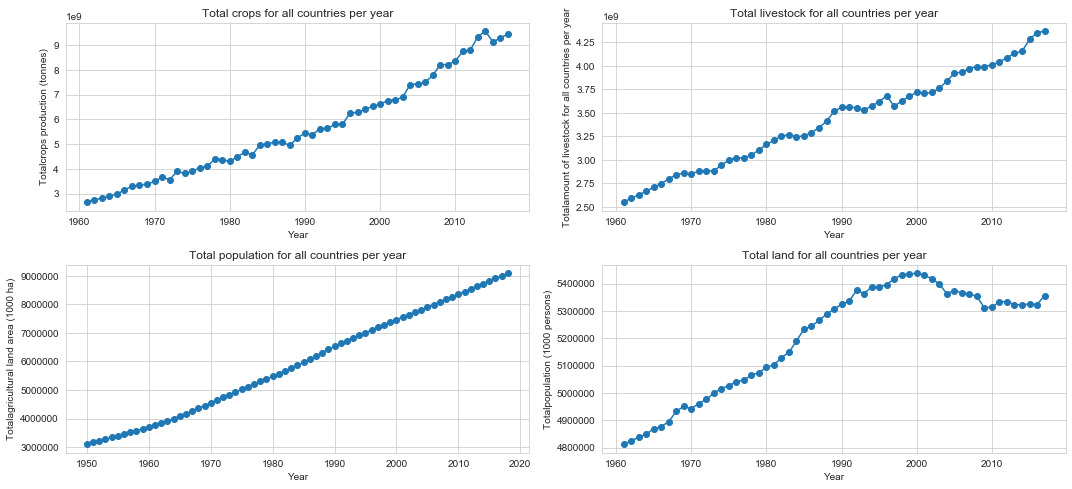

In [40]:
f, ax = plt.subplots(2, 2, figsize=(15, 7))

y_labels = [
    'crops production (tonnes)',
    'amount of livestock for all countries per year',
    'agricultural land area (1000 ha)',
    'population (1000 persons)'
]

for i, (df, name) in enumerate(zip(total_productions_per_year_per_country, agricultural_dfs_names)):
    prod_per_year = df.groupby('year').sum().reset_index()
    ax[i // 2, i % 2].plot_date(x=prod_per_year['year'], y=prod_per_year['value'], linestyle="-", xdate=True);
    ax[i // 2, i % 2].set_title(f'Total {name} for all countries per year')
    ax[i // 2, i % 2].set_xlabel('Year')
    ax[i // 2, i % 2].set_ylabel('Total' + y_labels[i])

f.tight_layout()

As expected, the total amount and production of goods **have increased** as well as the total population. Also we observe that the discrepancy of the time points of observation, indeed, does not influence the interpretation of the data. Interestingly, in the year 2000 the amount of agricultural land area reached its peak and then decreased. 

## Correlations

Our final aim is to **compare** the livestocks and agricultural production of different countries. Would it be fair though to compare big countries with tiny ones? Densely populated and almost uninhabited ones? We started looking for **normalisation** criteria. 
Of course, the *bare size* of a country is not a good normalization factor. What about Russia and its permafrost areas, or Egypt and its deserts?

We therefore came up with two factors that we believe to be more representative:
- **Agricultural area**: the actual amount of area used for cultivation. In this way we could compare the production expressed in [tonnes/km^2].This information is contained into the final_land_df.
- **Population**: the number of inhabitants of a country. In this way we could compare the production expressed in [tonnes-per-person] This information is contained into the final_population_df.

The following analysis has been done to understand if these criteria are valid and if we can really obtain more meaningful data by comparing normalised productions (both for area and population ) instead of the absolute one. In order to do so, we examined possible **correlations** between different observations in our datasets. 

First, let us calculate the correlation between **total production of crops**, the **amount of livestock** and the **agricultural area used** over the observed time period. If some time points are present in one dataset and missing in another, then we drop the row that corresponds to this time point. Also, now that we are digging deeper into the data, missing data could affect our results in a non-negligable way. Let us check this.

In [41]:
# Get a set representation of the countries for each dataset
crop_unique_countries = set(crop_per_year_per_country['country'].unique())
livestock_unique_countries = set(livestock_per_year_per_country['country'].unique())
population_unique_countries = set(population_per_year_per_country['country'].unique())
land_unique_countries = set(land_per_year_per_country['country'].unique())

# Get non-common countries
all_countries = crop_unique_countries.union(livestock_unique_countries, population_unique_countries, land_unique_countries)
intersected_set_of_countries = crop_unique_countries.intersection(livestock_unique_countries, population_unique_countries, land_unique_countries)
non_common_countries = all_countries.symmetric_difference(intersected_set_of_countries)
non_common_countries

{'Andorra',
 'Anguilla',
 'Aruba',
 'Bonaire, Sint Eustatius and Saba',
 'Channel Islands',
 'China, Macao SAR',
 'CuraÃ§ao',
 'Falkland Islands (Malvinas)',
 'Gibraltar',
 'Greenland',
 'Holy See',
 'Isle of Man',
 'Maldives',
 'Marshall Islands',
 'Mayotte',
 'Monaco',
 'Netherlands Antilles (former)',
 'Norfolk Island',
 'Northern Mariana Islands',
 'Palau',
 'Saint BarthÃ©lemy',
 'Saint-Martin (French Part)',
 'San Marino',
 'Sint Maarten (Dutch Part)',
 'Turks and Caicos Islands'}

The countries listed above are the non-overlapping countries, meaning that some data are missing. Most of them are not relevant for our project, hence we can exclude them for this initial analysis.

Now we can **merge** 4 agricultural datasets into one and calculate the Pearson correlations between 4 different features for each country: 

- Total crop production
- Total amount of livestock
- Total population
- Total agricultural land area

In [42]:
# Merge 4 datasets into one
merged_data = (crop_per_year_per_country 
                .merge(livestock_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'],
                    suffixes=('_crop', '_livestock'))
          
                .merge(population_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'])             
                .rename(columns={'value' : 'value_population'})
          
                .merge(land_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'])
                .rename(columns={'value' : 'value_land_area'})
         )

merged_data

country       year  value_crop  value_livestock  value_population  \
0      Afghanistan 1961-01-01   5909080.0       25104700.0          9169.410   
1      Afghanistan 1962-01-01   5934534.0       25442170.0          9351.441   
2      Afghanistan 1963-01-01   5686583.0       25605000.0          9543.205   
3      Afghanistan 1964-01-01   6147934.0       25855300.0          9744.781   
4      Afghanistan 1965-01-01   6274668.0       26205500.0          9956.320   
...            ...        ...         ...              ...               ...   
11310     Zimbabwe 2013-01-01   3531221.0       11489859.0         13350.373   
11311     Zimbabwe 2014-01-01   3637340.0        9437613.0         13586.707   
11312     Zimbabwe 2015-01-01   2519574.0        9458463.0         13814.629   
11313     Zimbabwe 2016-01-01   3054562.0       10676793.0         14030.331   
11314     Zimbabwe 2017-01-01   3158431.0       10755331.0         14236.595   

       value_land_area  
0              37700.0  
1              37760.0  
2              37810.0  
3              37873.0  
4              37875.0  
...                ...  
11310          16200.0  
11311          16200.0  
11312          16200.0  
11313          16200.0  
11314          16200.0  

[11315 rows x 6 columns]

In [43]:
# Calculate the correlation matrix for each country with 4 features
corr_data = merged_data.groupby('country').corr().fillna(0)

# Getting the paired correlations
crop_land_area_corr = corr_data.xs('value_crop', level=1)['value_land_area']
crop_population_corr = corr_data.xs('value_crop', level=1)['value_population']
livestock_population_corr = corr_data.xs('value_livestock', level=1)['value_population']

corr_data

value_crop  value_livestock  value_population  \
country                                                                       
Afghanistan value_crop          1.000000         0.295728          0.773567   
            value_livestock     0.295728         1.000000          0.064128   
            value_population    0.773567         0.064128          1.000000   
            value_land_area    -0.029503        -0.106985         -0.335440   
Albania     value_crop          1.000000         0.038380          0.591984   
...                                  ...              ...               ...   
Zambia      value_land_area     0.823103         0.942049          0.973502   
Zimbabwe    value_crop          1.000000         0.167213          0.079248   
            value_livestock     0.167213         1.000000          0.800283   
            value_population    0.079248         0.800283          1.000000   
            value_land_area    -0.032330         0.770684          0.938629   

                              value_land_area  
country                                        
Afghanistan value_crop              -0.029503  
            value_livestock         -0.106985  
            value_population        -0.335440  
            value_land_area          1.000000  
Albania     value_crop              -0.296381  
...                                       ...  
Zambia      value_land_area          1.000000  
Zimbabwe    value_crop              -0.032330  
            value_livestock          0.770684  
            value_population         0.938629  
            value_land_area          1.000000  

[884 rows x 4 columns]

A quick glance at the correlation matrix shows that some countries seem to rely more on livestock than on crop production to maitain their population growths. For example, in Afghanistan, we see that the population size has a very strong correlation with crop production and a nearly zero correlation with the total livestock. Looking at Zimbabwe, we see the exact opposite situation. We will plot these correlations in order to visualize the entire dataset.

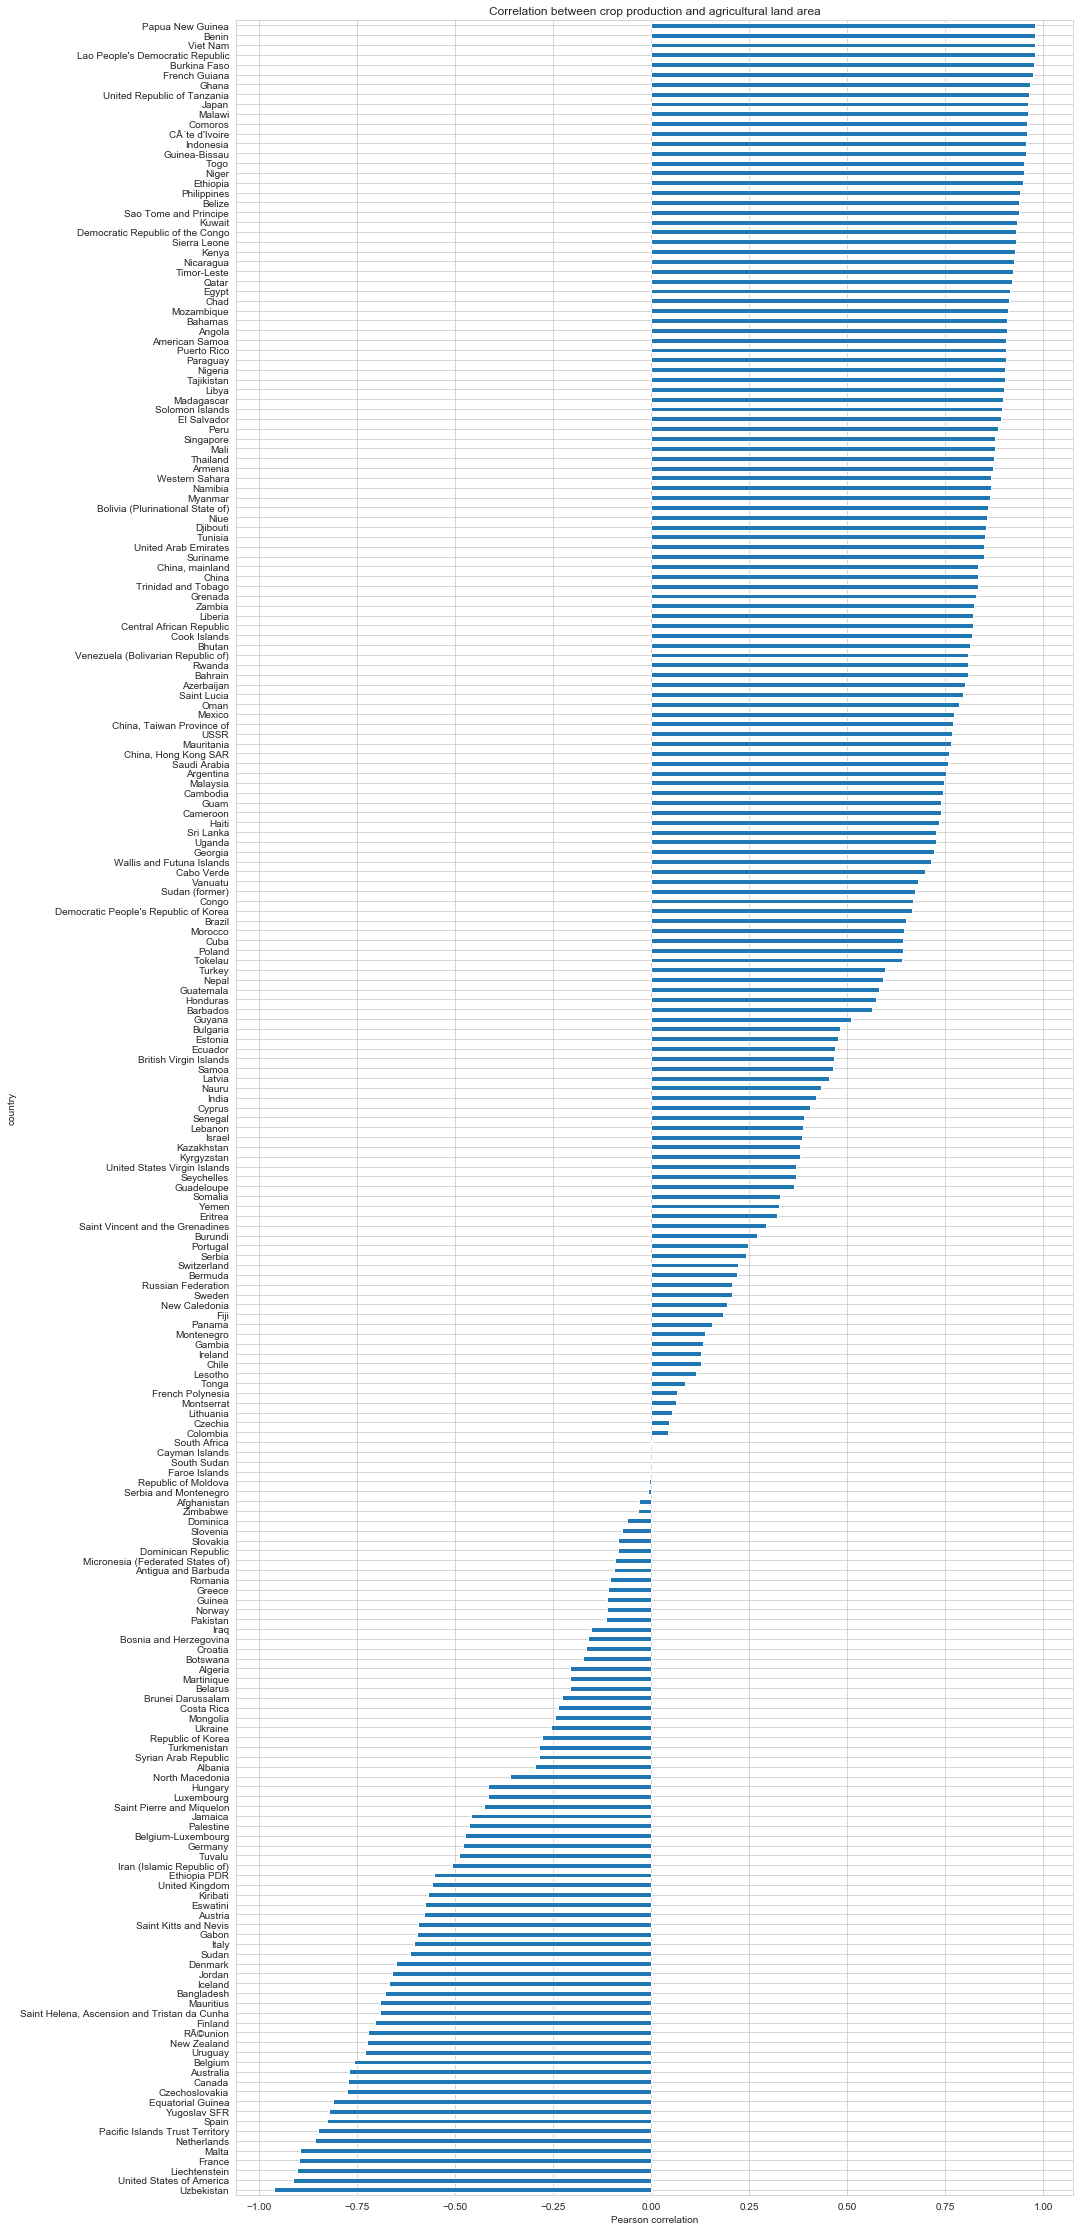

In [44]:
f, ax = plt.subplots(figsize=(15, 40))
crop_land_area_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between crop production and agricultural land area')
ax.set_xlabel('Pearson correlation');

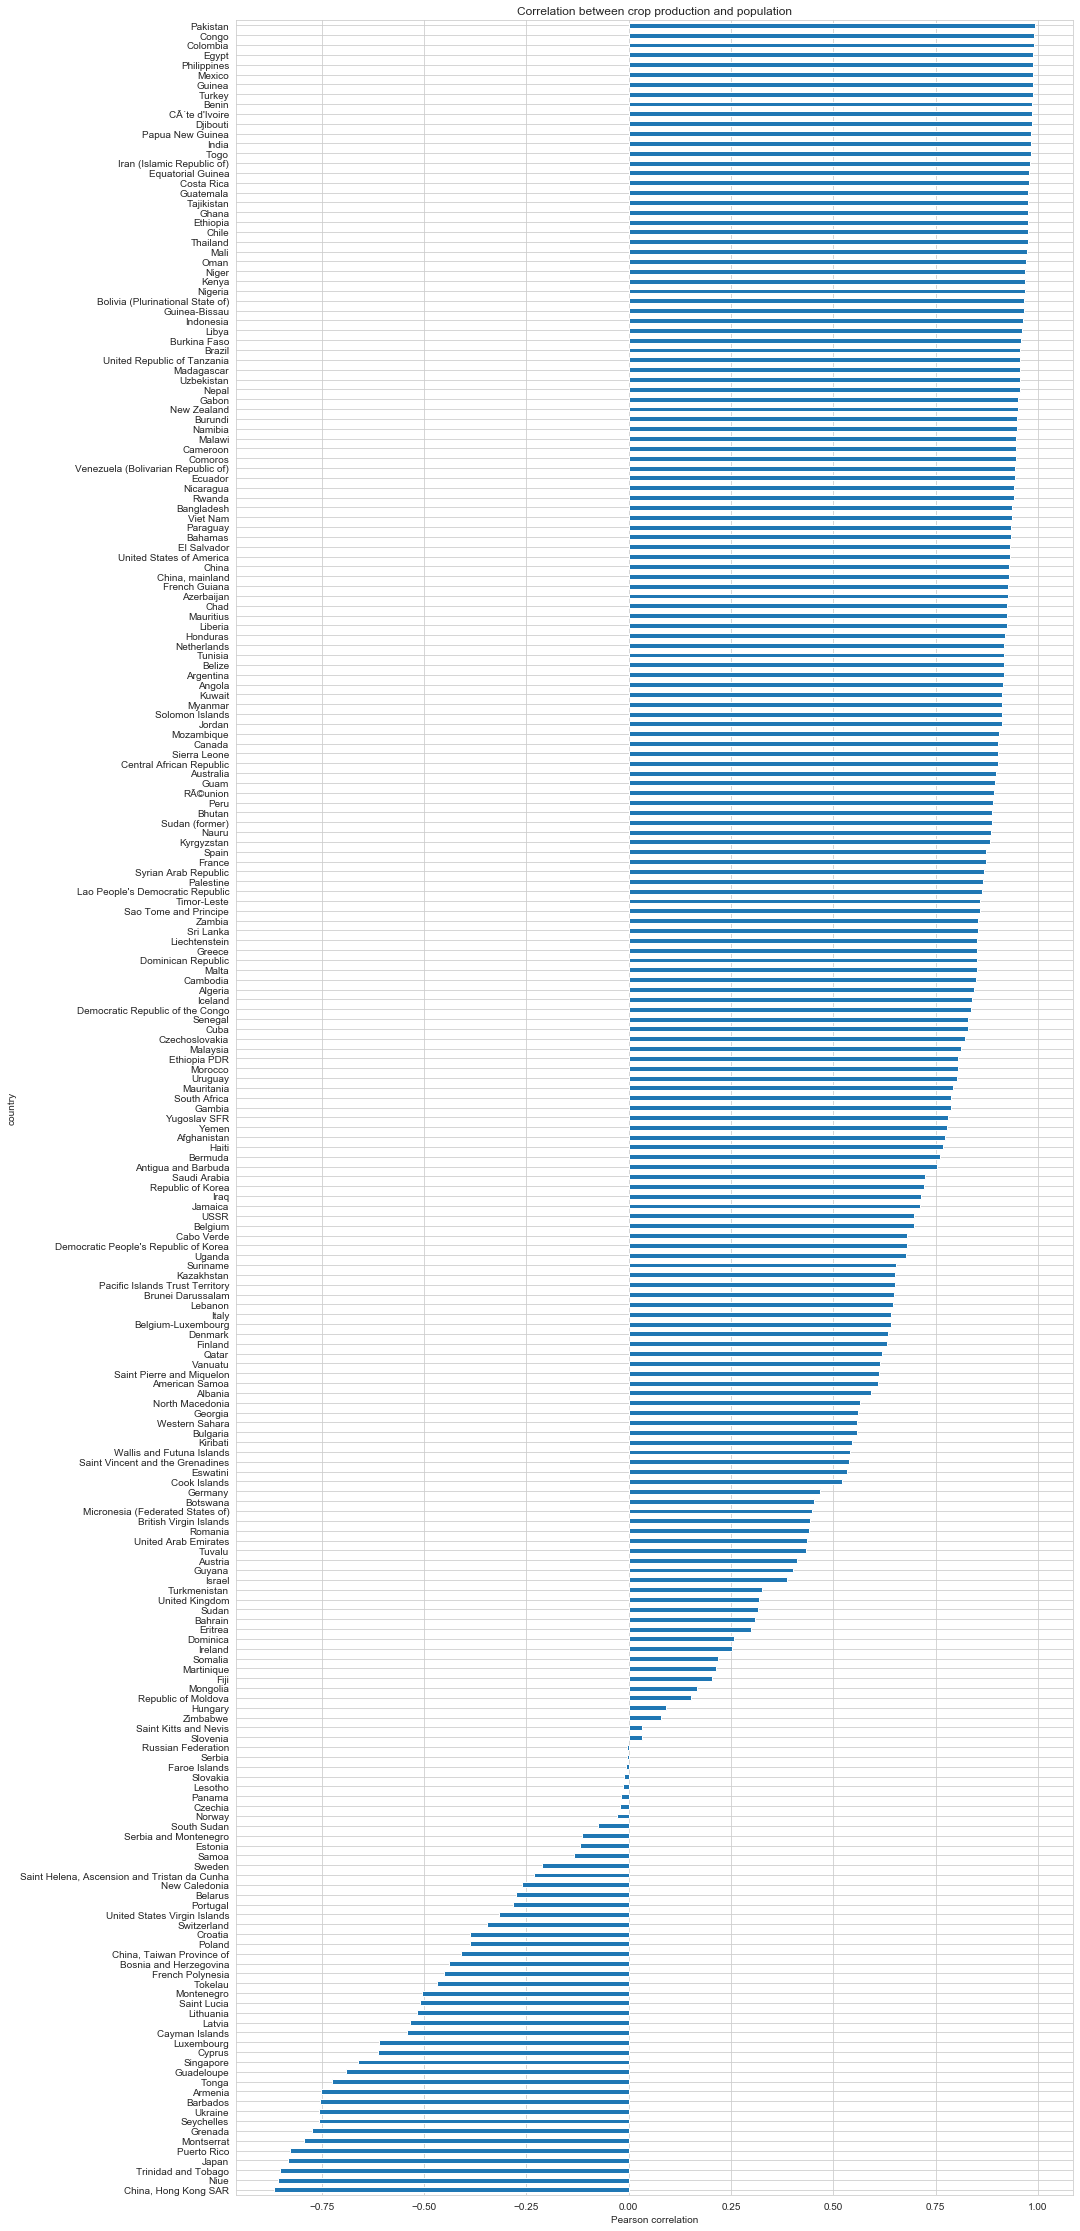

In [45]:
f, ax = plt.subplots(figsize=(15, 40))
crop_population_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between crop production and population')
ax.set_xlabel('Pearson correlation');

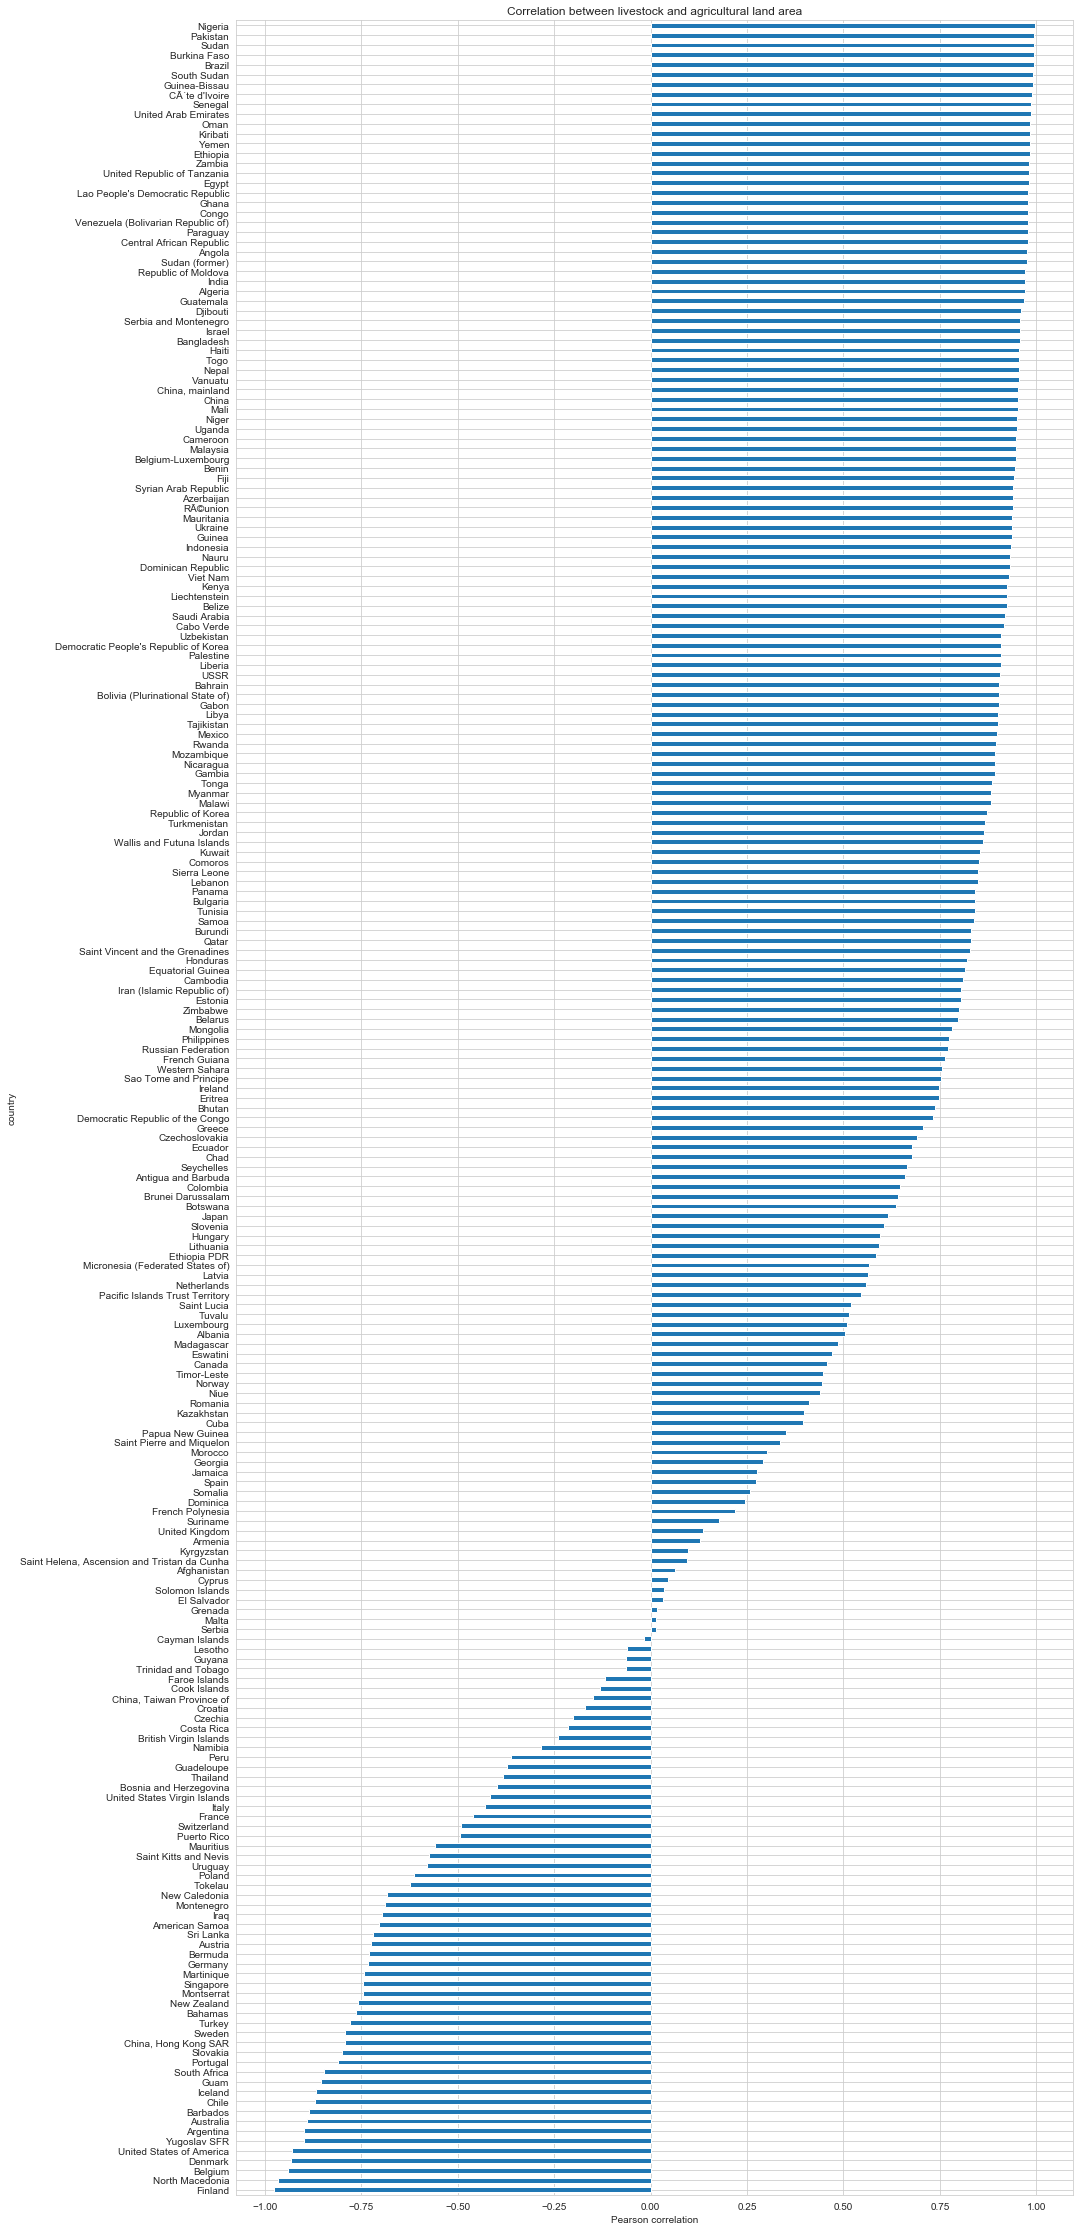

In [46]:
f, ax = plt.subplots(figsize=(15, 40))
livestock_population_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between livestock and agricultural land area')
ax.set_xlabel('Pearson correlation');

Surpisingly, the **correlation** between our features is very **variable** with time and this is true for each country.

- The increase of the **use of the land for agriculture** does not necessarily cause the increase of the **crop production** and vice versa.
- The increase of the **population** does not necessarily cause the increase of the **crop production** and vice versa.
- The increase of the **population** does not necessarily cause the increase in the amount of **livestock** and vice versa.

We can conclude that both the population and the agricultural land area are **not good normalising factors**. Therefore, we should treat every feature as an independent one for future analysis.

In [47]:
# Export dataframes to CSV for use in other notebooks

export_csv = merged_data.to_csv(r'pandas_dfs/merged_data.csv', index = None, header=True)
export_csv = years_per_country.to_csv(r'pandas_dfs/years_per_country.csv', index = None, header=True)
export_csv = country_wars_df.to_csv(r'pandas_dfs/country_wars_df.csv', index = None, header=True)
export_csv = final_wars_df.to_csv(r'pandas_dfs/final_wars_df.csv', index = None, header=True)

## Our Project

At this point of our analysis, it is clear that the data we are dealing with is **complex** and that we need to narrow down our project to a smaller more manageable scope if we are to obtain meaningful results. Therefore, our goal is not to describe the general production trends for all the countries as there are simply too many factors that make each country and each war unique. Because of this, we doubt that we would be able to come to any insightful conclusions with a more general approach. 

This is why we have decided to only **focus on few cases** that have grasped our attention, in order to better estimate the impact of war on their unique situations. 

To select countries of interest, we created a plotting function that displays the evolution of crop and livestock production during war and non-war years. After visualizing many different countries with our function, interesting situations in Afghanistan and Lebanon have caught our attention. The plots can be seen below.

In [48]:
# Import our function for ploting. Function can be found in the src folder
from src.plots import plot_feature_and_war

In [49]:
final_wars_df.head()


name                     country   end_year  \
0  Indo-Pakistani War of 1965.  People's Republic of China 1965-01-01   
1  Indo-Pakistani War of 1965.  People's Republic of China 1965-01-01   
2  Indo-Pakistani War of 1965.                    Pakistan 1965-01-01   
3  Indo-Pakistani War of 1965.                    Pakistan 1965-01-01   
4  Indo-Pakistani War of 1965.                       India 1965-01-01   

   is_state location participant start_year  
0      True  Kashmir       India 1965-01-01  
1      True  Kashmir    Pakistan 1965-01-01  
2      True  Kashmir       India 1965-01-01  
3      True  Kashmir    Pakistan 1965-01-01  
4      True  Kashmir       India 1965-01-01

In [50]:
merged_data.head()

country       year  value_crop  value_livestock  value_population  \
0  Afghanistan 1961-01-01   5909080.0       25104700.0          9169.410   
1  Afghanistan 1962-01-01   5934534.0       25442170.0          9351.441   
2  Afghanistan 1963-01-01   5686583.0       25605000.0          9543.205   
3  Afghanistan 1964-01-01   6147934.0       25855300.0          9744.781   
4  Afghanistan 1965-01-01   6274668.0       26205500.0          9956.320   

   value_land_area  
0          37700.0  
1          37760.0  
2          37810.0  
3          37873.0  
4          37875.0

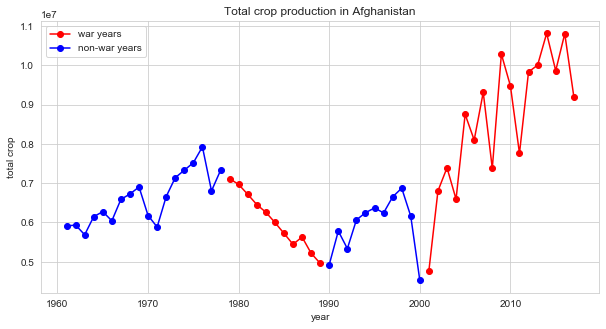

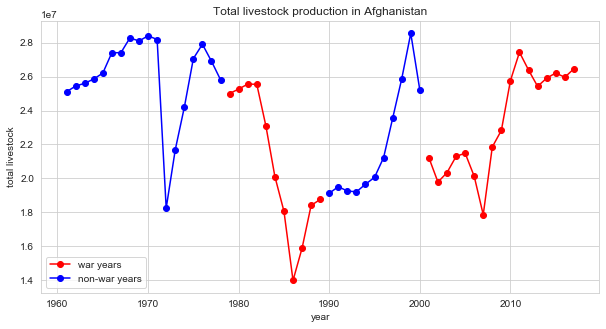

In [51]:
# Output plots for Afghanistan
country = "Afghanistan"

plot_feature_and_war(final_wars_df, merged_data, 'crop', country)
plot_feature_and_war(final_wars_df, merged_data, 'livestock', country)

The reason why we have chosen to further investigate this country is that it has been afflicted by two very different wars. During the first, both the crop production and the livestock amount have descreased substantially meanwhile in the second case, despite the war, things have improved significantly. This comes as a surprise and we want to better understand the key factors that have made this two conflict so different.

# Second scenario

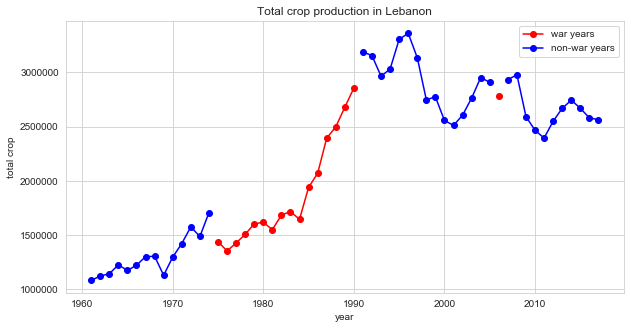

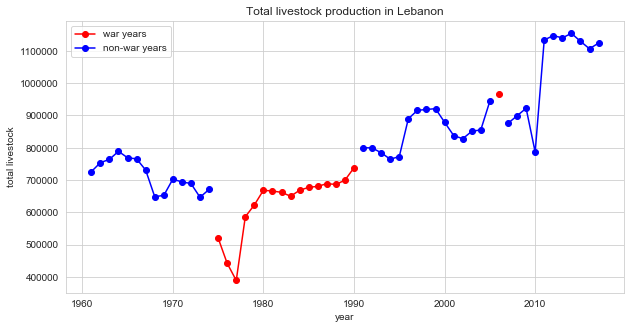

In [52]:
# Output plots for Lebanon
country = "Lebanon"

plot_feature_and_war(final_wars_df, merged_data, 'crop', country)
plot_feature_and_war(final_wars_df, merged_data, 'livestock', country)

Here, there's a very different war. In fact, now we are dealing with a civil war. It is interesting to see that there was an initial dip in livestock production while the crop production seemed unaffected, or even improved.

In [53]:
lebanon_crops = final_crop_df[final_crop_df['country']== 'Lebanon'].set_index(['item']) #selecting and using a better index
lebanon_crops = lebanon_crops.rename(columns={"value": "value_crop"}) #renaming to use later our nice plotting function
lebanon_crops #Using item aggregated

country       year  value_crop
item                                              
Cereals,Total       Lebanon 1961-01-01     96500.0
Cereals,Total       Lebanon 1962-01-01    106347.0
Cereals,Total       Lebanon 1963-01-01     84700.0
Cereals,Total       Lebanon 1964-01-01     89000.0
Cereals,Total       Lebanon 1965-01-01     80905.0
...                     ...        ...         ...
Vegetables Primary  Lebanon 2013-01-01    805476.0
Vegetables Primary  Lebanon 2014-01-01    852080.0
Vegetables Primary  Lebanon 2015-01-01    809616.0
Vegetables Primary  Lebanon 2016-01-01    801583.0
Vegetables Primary  Lebanon 2017-01-01    808526.0

[564 rows x 3 columns]

In [54]:
# Import our function for ploting. Function can be found in the src folder
from src.plots import *

In [55]:
def plot_item_and_war(wars_df, merged_data, feature, country): ##little generalization of our plotting function to avoid changes in the data structure
    
 
    country_prod_war = country_in_war(wars_df, merged_data, country)


    country_prod_war['war_value'] = np.where(country_prod_war['in_war'], country_prod_war['value_' + feature], np.NaN)
    country_prod_war['non_war_value'] = np.where(~country_prod_war['in_war'], country_prod_war['value_' + feature], np.NaN)

    f, ax = plt.subplots(1, 1, figsize=(10, 5))
    plt.title(f'Total {feature} production in {country}')
    ax.plot_date(country_prod_war['year'], country_prod_war['war_value'], color='red', label='war years', linestyle="-", xdate=True)
    ax.plot_date(country_prod_war['year'], country_prod_war['non_war_value'], color='blue', label='non-war years', linestyle="-", xdate=True)
    plt.xlabel('year')
    if (feature == 'crop'):
        plt.ylabel(f'total {item}')
        plt.title(f'Total {item} production in {country}')
    else:
        plt.ylabel(f'total {feature}')
        plt.title(f'Total {feature} production in {country}')
    
    ax.legend()

Cereals,Total
Citrus Fruit,Total
Coarse Grain, Total
Fruit Primary
Oilcrops, Cake Equivalent
Oilcrops, Oil Equivalent
Pulses,Total
Roots and Tubers,Total
Treenuts,Total
Vegetables Primary


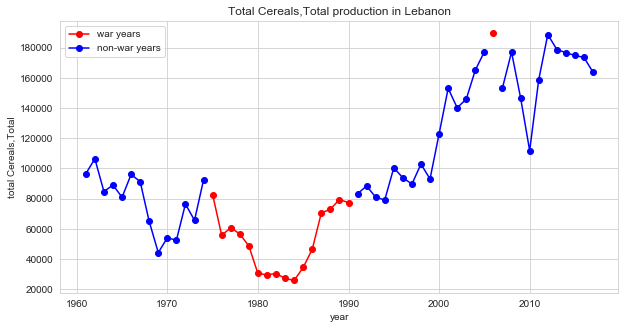

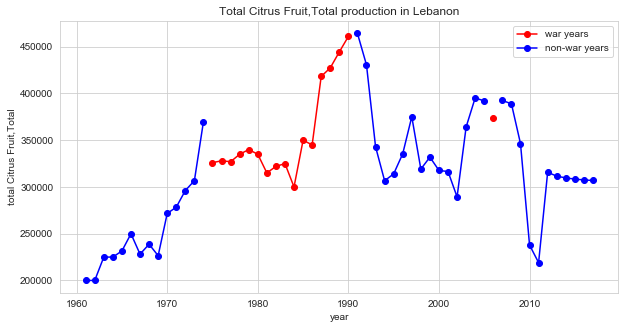

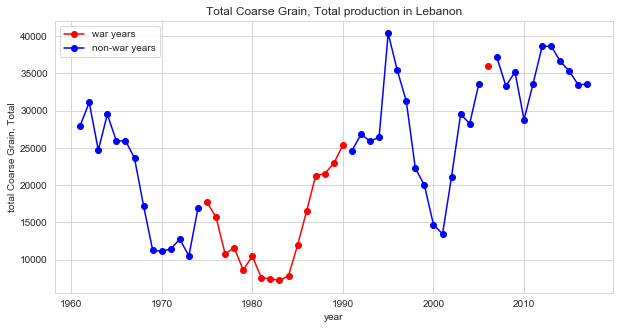

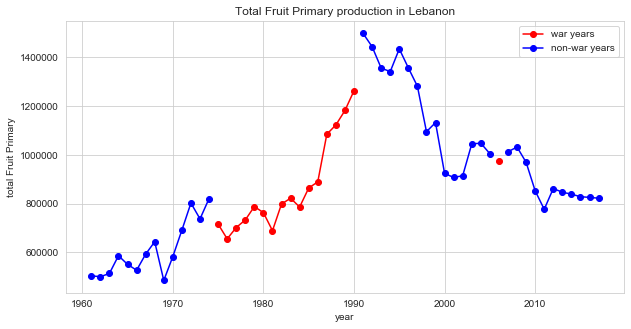

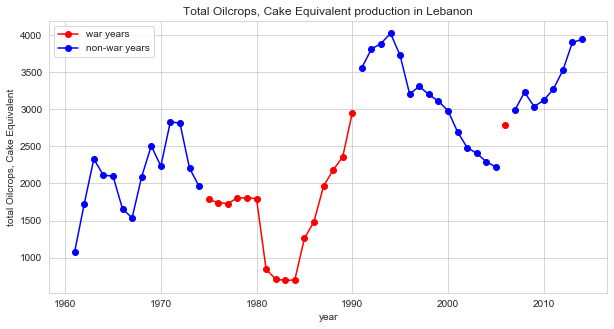

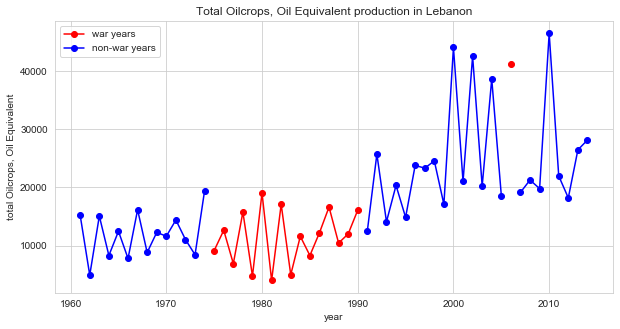

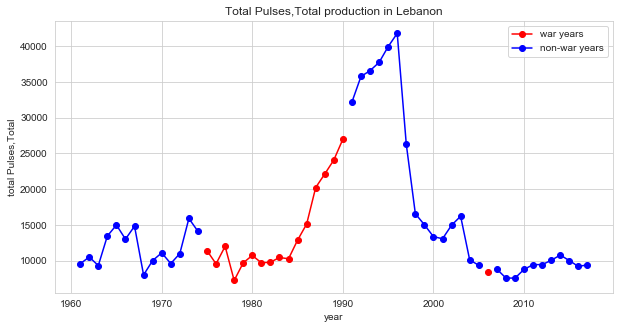

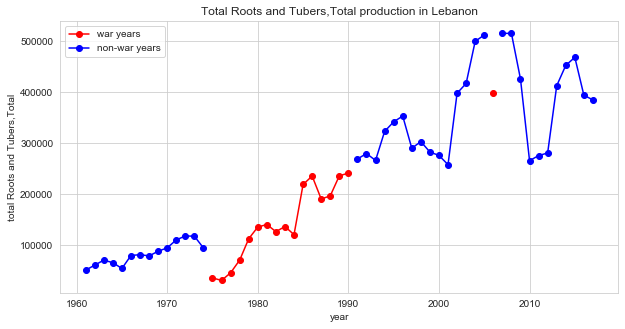

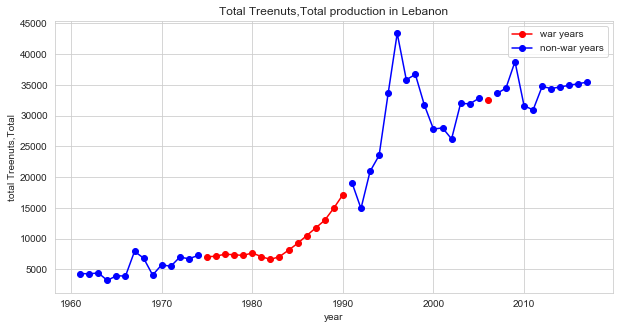

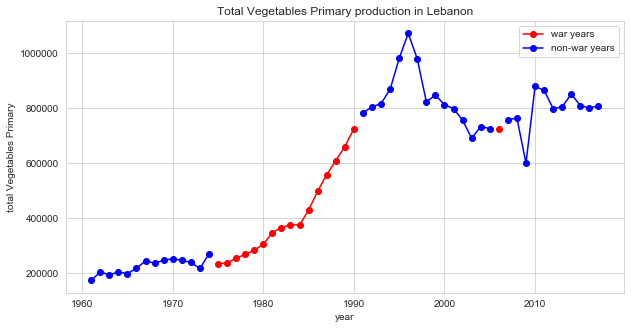

In [56]:
for item in lebanon_crops.index.unique():
    plot_item_and_war(final_wars_df, lebanon_crops.loc[item], 'crop', 'Lebanon')
    print(item)
    

In [57]:
leb_war = final_wars_df[final_wars_df['country'] == 'Lebanon']
leb_war.sort_values('start_year')

name  country   end_year  is_state location  \
955   Lebanese Civil War  Lebanon 1990-01-01     False  Lebanon   
952   Lebanese Civil War  Lebanon 1990-01-01     False  Lebanon   
953   Lebanese Civil War  Lebanon 1990-01-01     False  Lebanon   
954   Lebanese Civil War  Lebanon 1990-01-01     False  Lebanon   
956   Lebanese Civil War  Lebanon 1990-01-01     False  Lebanon   
995          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
994          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
993          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
992          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
991          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
990          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
711          Lebanon War  Lebanon 1985-01-01      True  Lebanon   
712          Lebanon War  Lebanon 1985-01-01      True  Lebanon   
996          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
1094         Lebanon War  Lebanon 1985-01-01     False  Lebanon   
903     2006 Lebanon War  Lebanon 2006-01-01     False   Levant   
902     2006 Lebanon War  Lebanon 2006-01-01     False   Levant   
901     2006 Lebanon War  Lebanon 2006-01-01     False   Levant   
900     2006 Lebanon War  Lebanon 2006-01-01     False   Levant   

                                            participant start_year  
955                                           Hezbollah 1975-01-01  
952                                       Amal Movement 1975-01-01  
953                        Islamic Unification Movement 1975-01-01  
954                          Lebanese National Movement 1975-01-01  
956                                      Lebanese Front 1975-01-01  
995                            Kurdistan Workers' Party 1982-01-01  
994                                      Al-Mourabitoun 1982-01-01  
993                        Islamic Unification Movement 1982-01-01  
992                                       Amal Movement 1982-01-01  
991                   Palestine Liberation Organization 1982-01-01  
990                                      Lebanese Front 1982-01-01  
711                                              Israel 1982-01-01  
712                                               Syria 1982-01-01  
996                                           Hezbollah 1982-01-01  
1094                           Kurdistan Workers' Party 1982-01-01  
903                                           Hezbollah 2006-01-01  
902   Popular Front for the Liberation of Palestine ... 2006-01-01  
901                            Lebanese Communist Party 2006-01-01  
900                                       Amal Movement 2006-01-01

In [58]:
civil_war = leb_war[leb_war['start_year']!= '2006'].sort_values('start_year')
civil_war

name  country   end_year  is_state location  \
952   Lebanese Civil War  Lebanon 1990-01-01     False  Lebanon   
953   Lebanese Civil War  Lebanon 1990-01-01     False  Lebanon   
954   Lebanese Civil War  Lebanon 1990-01-01     False  Lebanon   
955   Lebanese Civil War  Lebanon 1990-01-01     False  Lebanon   
956   Lebanese Civil War  Lebanon 1990-01-01     False  Lebanon   
711          Lebanon War  Lebanon 1985-01-01      True  Lebanon   
712          Lebanon War  Lebanon 1985-01-01      True  Lebanon   
990          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
991          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
992          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
993          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
994          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
995          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
996          Lebanon War  Lebanon 1985-01-01     False  Lebanon   
1094         Lebanon War  Lebanon 1985-01-01     False  Lebanon   

                            participant start_year  
952                       Amal Movement 1975-01-01  
953        Islamic Unification Movement 1975-01-01  
954          Lebanese National Movement 1975-01-01  
955                           Hezbollah 1975-01-01  
956                      Lebanese Front 1975-01-01  
711                              Israel 1982-01-01  
712                               Syria 1982-01-01  
990                      Lebanese Front 1982-01-01  
991   Palestine Liberation Organization 1982-01-01  
992                       Amal Movement 1982-01-01  
993        Islamic Unification Movement 1982-01-01  
994                      Al-Mourabitoun 1982-01-01  
995            Kurdistan Workers' Party 1982-01-01  
996                           Hezbollah 1982-01-01  
1094           Kurdistan Workers' Party 1982-01-01

So, there are two kind of partecipants. 5 partecipant from the beginning till the end (1975-1990), the other 10 are just involved for 3 years (1982-1985)

In [59]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

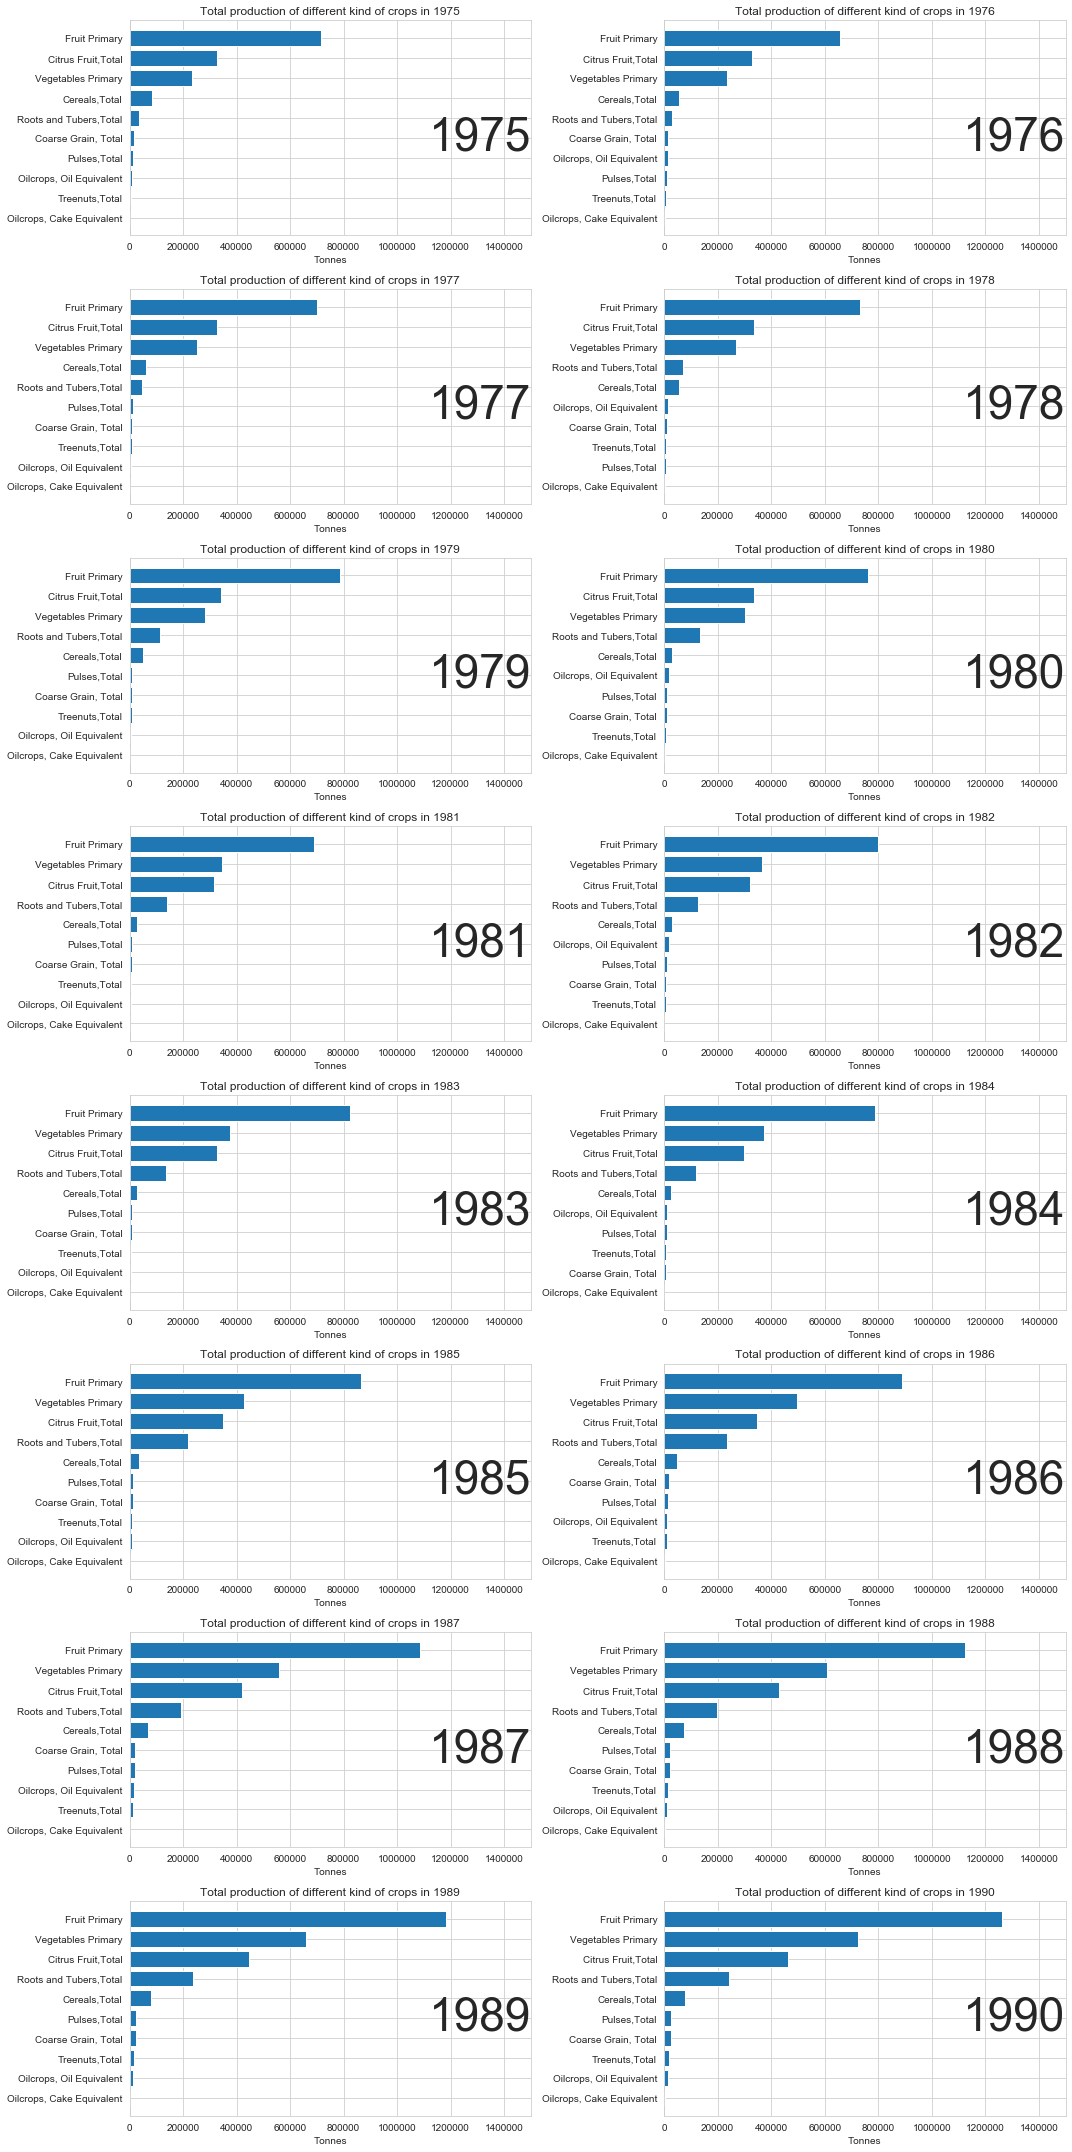

In [60]:
war_years = list(range(1975,1991))
f, ax = plt.subplots(8, 2, figsize=(15, 30))
ax_flattened = ax.flatten()
for i, year in enumerate(war_years):
    a = lebanon_crops[lebanon_crops['year'] == str(year)].sort_values('value_crop')
    ax_flattened[i].barh(a.index, a['value_crop'])
    ax_flattened[i].set_title('Total production of different kind of crops in '+ str(year))
    ax_flattened[i].set_xlabel('Tonnes')
    ax_flattened[i].set_xlim(0, 1500000)
    ax_flattened[i].text(1, 0.4, year, transform=ax_flattened[i].transAxes, size=46, ha='right')
plt.tight_layout()

import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, run)
HTML(animator.to_jshtml()) 

In [213]:
#taking the raw data about specifi productions

# Set filenames
crops_leb_path = './data/FAOSTAT_data_12-7-2019.csv'

# Read the files
crops_leb_df = pd.read_csv(crops_leb_path, encoding='latin-1')

print(f"Length of dataframe: {crops_leb_df.size}")

Length of dataframe: 50890


In [90]:
crops_leb_df.head()

Domain Code Domain  Area Code     Area  Element Code     Element  Item Code  \
0          QC  Crops        121  Lebanon          5510  Production        221   
1          QC  Crops        121  Lebanon          5510  Production        221   
2          QC  Crops        121  Lebanon          5510  Production        221   
3          QC  Crops        121  Lebanon          5510  Production        221   
4          QC  Crops        121  Lebanon          5510  Production        221   

                  Item  Year Code  Year    Unit   Value Flag Flag Description  
0  Almonds, with shell       1961  1961  tonnes  2500.0  NaN    Official data  
1  Almonds, with shell       1962  1962  tonnes  2800.0  NaN    Official data  
2  Almonds, with shell       1963  1963  tonnes  3000.0  NaN    Official data  
3  Almonds, with shell       1964  1964  tonnes  1800.0  NaN    Official data  
4  Almonds, with shell       1965  1965  tonnes  2400.0  NaN    Official data

In [91]:
crops_leb_df.duplicated().sum()

0

In [92]:
crops_real = drop_useless_columns(crops_leb_df)
crops_real.head(50)

country                 item       year    value
0   Lebanon  Almonds, with shell 1961-01-01   2500.0
1   Lebanon  Almonds, with shell 1962-01-01   2800.0
2   Lebanon  Almonds, with shell 1963-01-01   3000.0
3   Lebanon  Almonds, with shell 1964-01-01   1800.0
4   Lebanon  Almonds, with shell 1965-01-01   2400.0
5   Lebanon  Almonds, with shell 1966-01-01   2392.0
6   Lebanon  Almonds, with shell 1967-01-01   5948.0
7   Lebanon  Almonds, with shell 1968-01-01   4557.0
8   Lebanon  Almonds, with shell 1969-01-01   2438.0
9   Lebanon  Almonds, with shell 1970-01-01   3521.0
10  Lebanon  Almonds, with shell 1971-01-01   3277.0
11  Lebanon  Almonds, with shell 1972-01-01   4859.0
12  Lebanon  Almonds, with shell 1973-01-01   5181.0
13  Lebanon  Almonds, with shell 1974-01-01   5319.0
14  Lebanon  Almonds, with shell 1975-01-01   5300.0
15  Lebanon  Almonds, with shell 1976-01-01   5500.0
16  Lebanon  Almonds, with shell 1977-01-01   6000.0
17  Lebanon  Almonds, with shell 1978-01-01   6000.0
18  Lebanon  Almonds, with shell 1979-01-01   6000.0
19  Lebanon  Almonds, with shell 1980-01-01   6500.0
20  Lebanon  Almonds, with shell 1981-01-01   6000.0
21  Lebanon  Almonds, with shell 1982-01-01   5600.0
22  Lebanon  Almonds, with shell 1983-01-01   6000.0
23  Lebanon  Almonds, with shell 1984-01-01   6800.0
24  Lebanon  Almonds, with shell 1985-01-01   7600.0
25  Lebanon  Almonds, with shell 1986-01-01   8500.0
26  Lebanon  Almonds, with shell 1987-01-01   9300.0
27  Lebanon  Almonds, with shell 1988-01-01  10000.0
28  Lebanon  Almonds, with shell 1989-01-01  11500.0
29  Lebanon  Almonds, with shell 1990-01-01  13000.0
30  Lebanon  Almonds, with shell 1991-01-01  14756.0
31  Lebanon  Almonds, with shell 1992-01-01   9981.0
32  Lebanon  Almonds, with shell 1993-01-01  15500.0
33  Lebanon  Almonds, with shell 1994-01-01  18000.0
34  Lebanon  Almonds, with shell 1995-01-01  28000.0
35  Lebanon  Almonds, with shell 1996-01-01  37385.0
36  Lebanon  Almonds, with shell 1997-01-01  31254.0
37  Lebanon  Almonds, with shell 1998-01-01  32500.0
38  Lebanon  Almonds, with shell 1999-01-01  28600.0
39  Lebanon  Almonds, with shell 2000-01-01  24700.0
40  Lebanon  Almonds, with shell 2001-01-01  23900.0
41  Lebanon  Almonds, with shell 2002-01-01  23000.0
42  Lebanon  Almonds, with shell 2003-01-01  27400.0
43  Lebanon  Almonds, with shell 2004-01-01  27500.0
44  Lebanon  Almonds, with shell 2005-01-01  28300.0
45  Lebanon  Almonds, with shell 2006-01-01  28000.0
46  Lebanon  Almonds, with shell 2007-01-01  29400.0
47  Lebanon  Almonds, with shell 2008-01-01  30000.0
48  Lebanon  Almonds, with shell 2009-01-01  34300.0
49  Lebanon  Almonds, with shell 2010-01-01  27165.0

In [93]:
# Create a new dataframe keeping only the rows in which there is a missing value.
null_data = crops_real[crops_real.isnull().any(axis=1)]

# Output new dataframe
null_data

country      item       year  value
274   Lebanon  Avocados 1961-01-01    NaN
275   Lebanon  Avocados 1962-01-01    NaN
276   Lebanon  Avocados 1963-01-01    NaN
277   Lebanon  Avocados 1964-01-01    NaN
278   Lebanon  Avocados 1965-01-01    NaN
...       ...       ...        ...    ...
2604  Lebanon   Quinces 2013-01-01    NaN
2605  Lebanon   Quinces 2014-01-01    NaN
2606  Lebanon   Quinces 2015-01-01    NaN
2607  Lebanon   Quinces 2016-01-01    NaN
2608  Lebanon   Quinces 2017-01-01    NaN

[122 rows x 4 columns]

strange thing happening

In [94]:
null_data.groupby('item').count()

country  year  value
item                                             
Avocados                          37    37      0
Carobs                            37    37      0
Chillies and peppers, green       27    27      0
Quinces                           21    21      0

In [95]:
null_data[null_data['item']=='Avocados']['year'].unique()

array(['1961-01-01T00:00:00.000000000', '1962-01-01T00:00:00.000000000',
       '1963-01-01T00:00:00.000000000', '1964-01-01T00:00:00.000000000',
       '1965-01-01T00:00:00.000000000', '1966-01-01T00:00:00.000000000',
       '1967-01-01T00:00:00.000000000', '1968-01-01T00:00:00.000000000',
       '1969-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000',
       '1971-01-01T00:00:00.000000000', '1972-01-01T00:00:00.000000000',
       '1973-01-01T00:00:00.000000000', '1974-01-01T00:00:00.000000000',
       '1975-01-01T00:00:00.000000000', '1976-01-01T00:00:00.000000000',
       '1977-01-01T00:00:00.000000000', '1978-01-01T00:00:00.000000000',
       '1979-01-01T00:00:00.000000000', '1980-01-01T00:00:00.000000000',
       '1981-01-01T00:00:00.000000000', '1982-01-01T00:00:00.000000000',
       '1983-01-01T00:00:00.000000000', '1984-01-01T00:00:00.000000000',
       '1985-01-01T00:00:00.000000000', '1986-01-01T00:00:00.000000000',
       '1987-01-01T00:00:00.000000000', '1988-01-01

In [96]:
crops_real[crops_real['year'] == '1963'] #WTF

country                              item       year    value
2     Lebanon               Almonds, with shell 1963-01-01   3000.0
59    Lebanon  Anise, badian, fennel, coriander 1963-01-01     50.0
105   Lebanon                            Apples 1963-01-01  75000.0
162   Lebanon                          Apricots 1963-01-01   5000.0
219   Lebanon                        Artichokes 1963-01-01   3200.0
...       ...                               ...        ...      ...
3352  Lebanon        Vegetables, leguminous nes 1963-01-01   5500.0
3409  Lebanon                           Vetches 1963-01-01   2400.0
3466  Lebanon               Walnuts, with shell 1963-01-01    400.0
3523  Lebanon                       Watermelons 1963-01-01  21000.0
3580  Lebanon                             Wheat 1963-01-01  60000.0

[62 rows x 4 columns]

from 1998, products have more than one entry

In [103]:
crops_real = crops_real.rename(columns={"value": "value_crop"}).set_index('item') #renaming to use later our nice plotting function
crops_real 

country       year  value_crop
item                                               
Almonds, with shell  Lebanon 1961-01-01      2500.0
Almonds, with shell  Lebanon 1962-01-01      2800.0
Almonds, with shell  Lebanon 1963-01-01      3000.0
Almonds, with shell  Lebanon 1964-01-01      1800.0
Almonds, with shell  Lebanon 1965-01-01      2400.0
...                      ...        ...         ...
Wheat                Lebanon 2013-01-01    140000.0
Wheat                Lebanon 2014-01-01    140000.0
Wheat                Lebanon 2015-01-01    139452.0
Wheat                Lebanon 2016-01-01    140000.0
Wheat                Lebanon 2017-01-01    130000.0

[3635 rows x 3 columns]

In [172]:
crops_real

country       year  value_crop
item                                               
Almonds, with shell  Lebanon 1961-01-01      2500.0
Almonds, with shell  Lebanon 1962-01-01      2800.0
Almonds, with shell  Lebanon 1963-01-01      3000.0
Almonds, with shell  Lebanon 1964-01-01      1800.0
Almonds, with shell  Lebanon 1965-01-01      2400.0
...                      ...        ...         ...
Wheat                Lebanon 2013-01-01    140000.0
Wheat                Lebanon 2014-01-01    140000.0
Wheat                Lebanon 2015-01-01    139452.0
Wheat                Lebanon 2016-01-01    140000.0
Wheat                Lebanon 2017-01-01    130000.0

[3635 rows x 3 columns]

country       year  value_crop
item                                                            
Almonds, with shell               Lebanon 1961-01-01      2500.0
Anise, badian, fennel, coriander  Lebanon 1961-01-01        40.0
Apples                            Lebanon 1961-01-01     85000.0
Apricots                          Lebanon 1961-01-01      6000.0
Artichokes                        Lebanon 1961-01-01      3200.0
...                                   ...        ...         ...
Vegetables, leguminous nes        Lebanon 1961-01-01      8000.0
Vetches                           Lebanon 1961-01-01      2800.0
Walnuts, with shell               Lebanon 1961-01-01       700.0
Watermelons                       Lebanon 1961-01-01     25000.0
Wheat                             Lebanon 1961-01-01     68500.0

[62 rows x 3 columns]

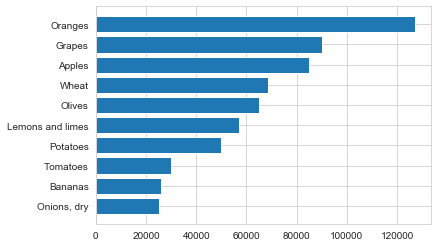

In [170]:
yearly = crops_real[crops_real['year'] == '1961']
best = yearly.sort_values('value_crop', ascending = False).iloc[:10]
lista = best.index.to_list()
best_crops_real = yearly[yearly.index.isin(lista)].sort_values('value_crop')
plt.barh(best_crops_real.index, best_crops_real['value_crop'])
yearly

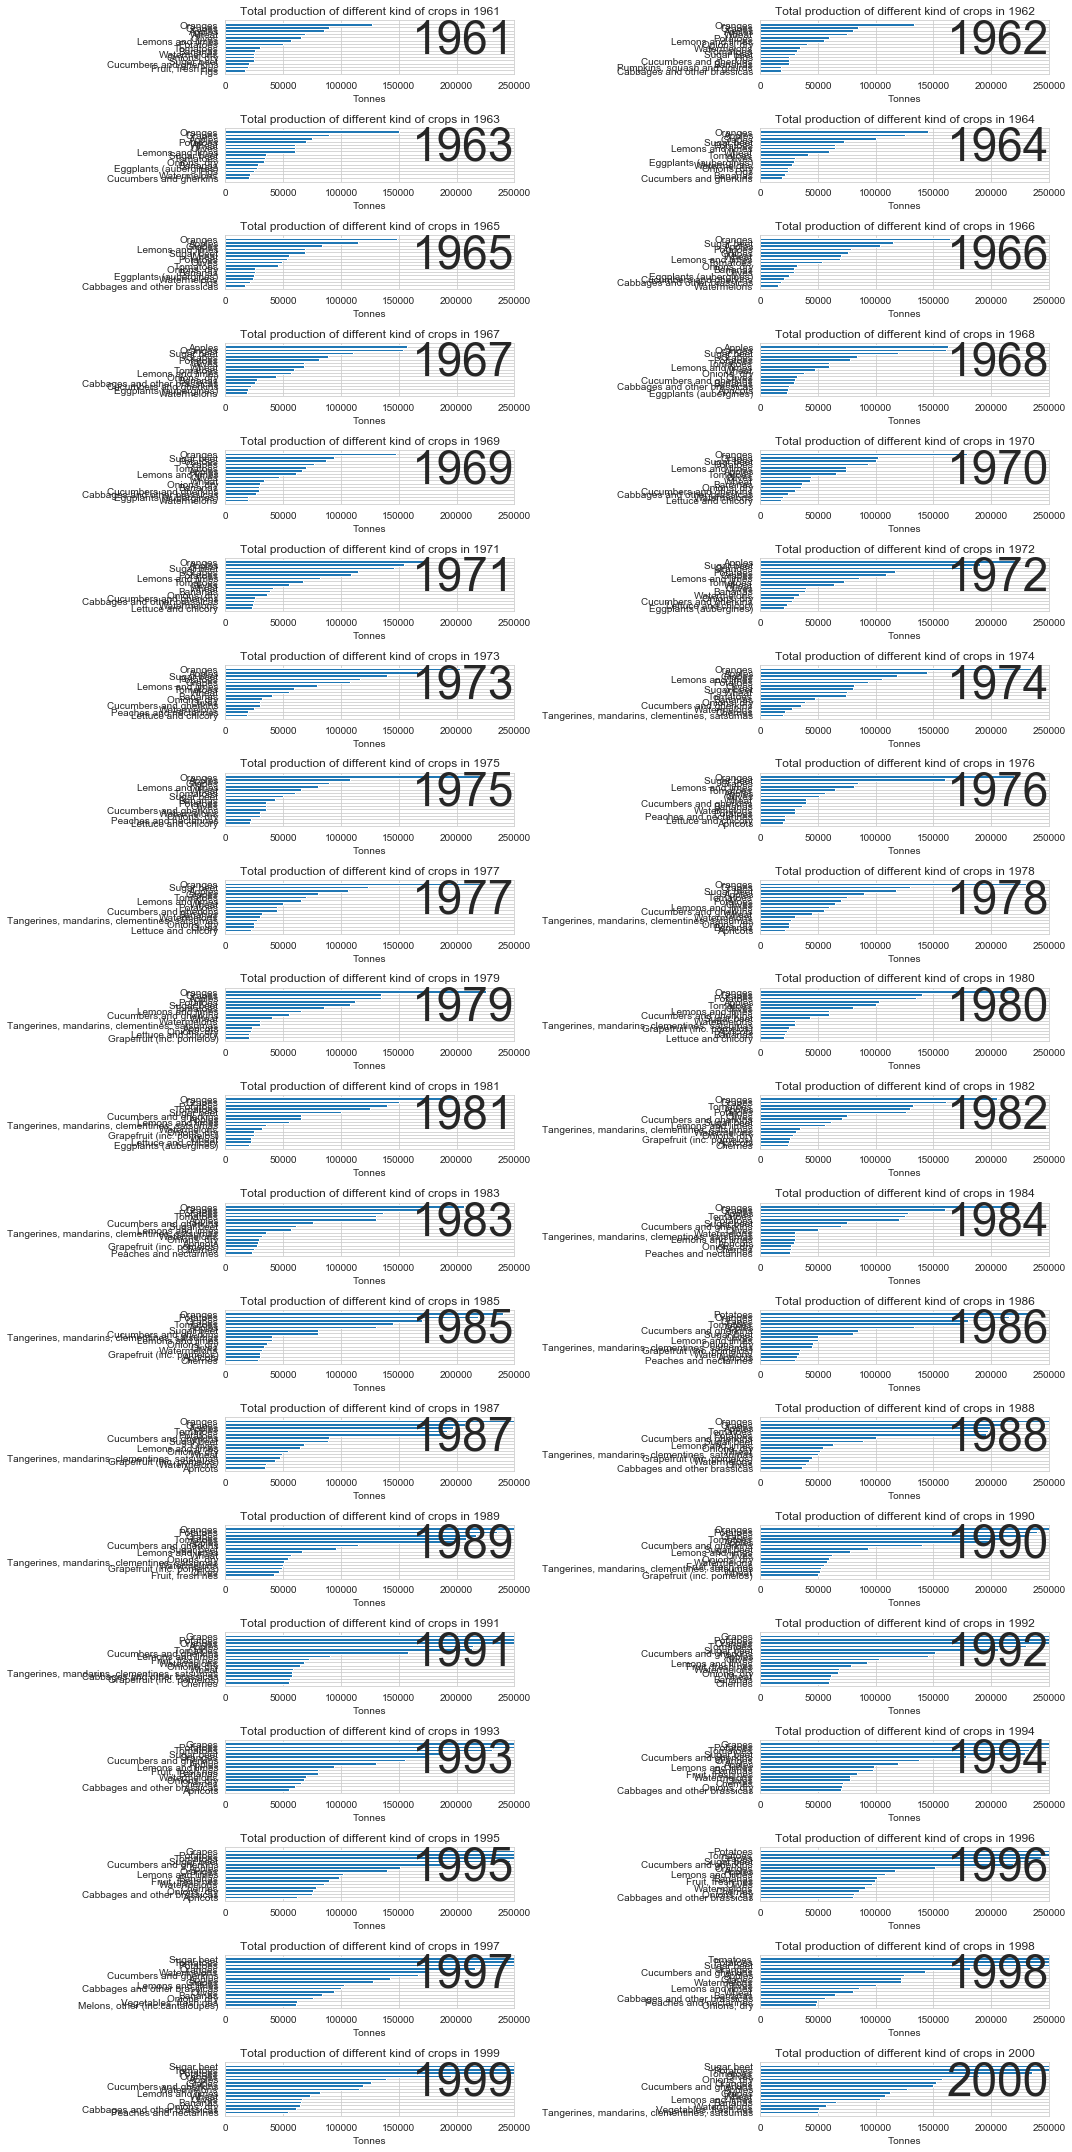

In [168]:
war_years = list(range(1961,2001))
f, ax = plt.subplots(20, 2, figsize=(15, 30))
ax_flattened = ax.flatten()
for i, year in enumerate(war_years):
    yearly = crops_real[crops_real['year'] == str(year)]
    best = yearly.sort_values('value_crop', ascending = False).iloc[:15]
    lista = best.index.to_list()
    best_crops_real = yearly[yearly.index.isin(lista)].sort_values('value_crop')
    #a = best_crops_real[best_crops_real['year'] == str(year)].sort_values('value_crop')
    ax_flattened[i].barh(best_crops_real.index, best_crops_real['value_crop'])
    ax_flattened[i].set_title('Total production of different kind of crops in '+ str(year))
    ax_flattened[i].set_xlabel('Tonnes')
    ax_flattened[i].set_xlim(0, 250000)
    ax_flattened[i].text(1, 0.4, year, transform=ax_flattened[i].transAxes, size=46, ha='right')
plt.tight_layout()

In [169]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [179]:
current_year = '1961'
dff = (crops_real[crops_real['year'].eq(current_year)]
       .sort_values(by='value_crop', ascending=False)
       .head(15))
dff

country       year  value_crop
item                                                  
Oranges                 Lebanon 1961-01-01    127000.0
Grapes                  Lebanon 1961-01-01     90000.0
Apples                  Lebanon 1961-01-01     85000.0
Wheat                   Lebanon 1961-01-01     68500.0
Olives                  Lebanon 1961-01-01     65000.0
Lemons and limes        Lebanon 1961-01-01     57000.0
Potatoes                Lebanon 1961-01-01     50000.0
Tomatoes                Lebanon 1961-01-01     30000.0
Bananas                 Lebanon 1961-01-01     26000.0
Onions, dry             Lebanon 1961-01-01     25000.0
Watermelons             Lebanon 1961-01-01     25000.0
Sugar beet              Lebanon 1961-01-01     24500.0
Cucumbers and gherkins  Lebanon 1961-01-01     20000.0
Fruit, fresh nes        Lebanon 1961-01-01     19800.0
Figs                    Lebanon 1961-01-01     17000.0

<BarContainer object of 15 artists>

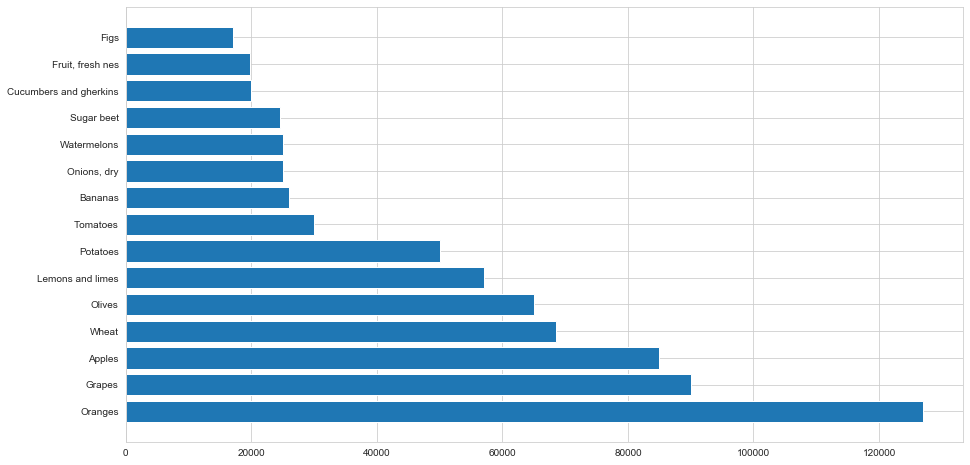

In [180]:
ig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff.index, dff['value_crop'])

In [200]:
current_year

'1961'

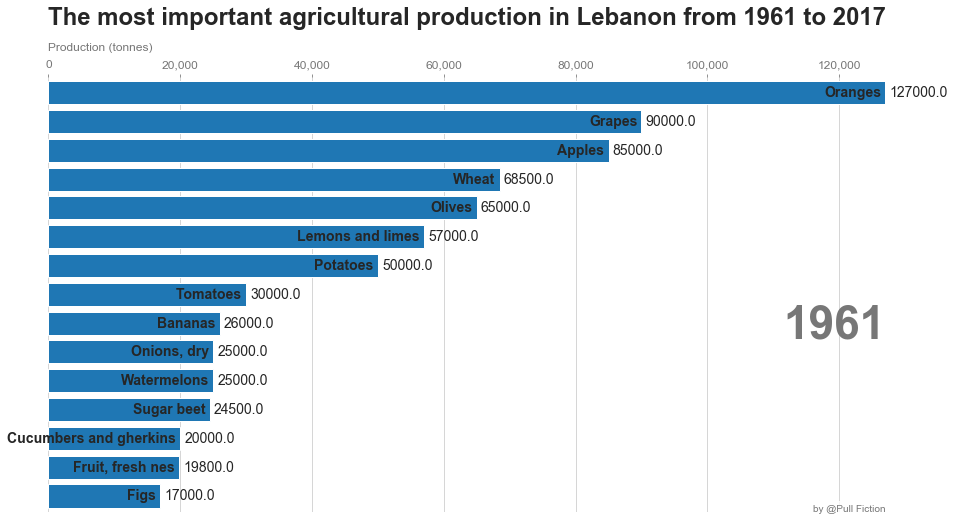

In [202]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = (crops_real[crops_real['year'].eq(str(year))]
           .sort_values(by='value_crop', ascending=False)
           .head(15))
    dff = dff[::-1] 
    ax.clear()
    ax.barh(dff.index, dff['value_crop']) # color=[colors[group_lk[x]] for x in dff['name']]
    dx = dff['value_crop'].max() / 200
    for i, (value, item) in enumerate(zip(dff['value_crop'], dff.index)):
        ax.text(value-dx, i,     item,           size=14, weight=600, ha='right', va='center')
        #ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Production (tonnes)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most important agricultural production in Lebanon from 1961 to 2017',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @Pull Fiction', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(1961)

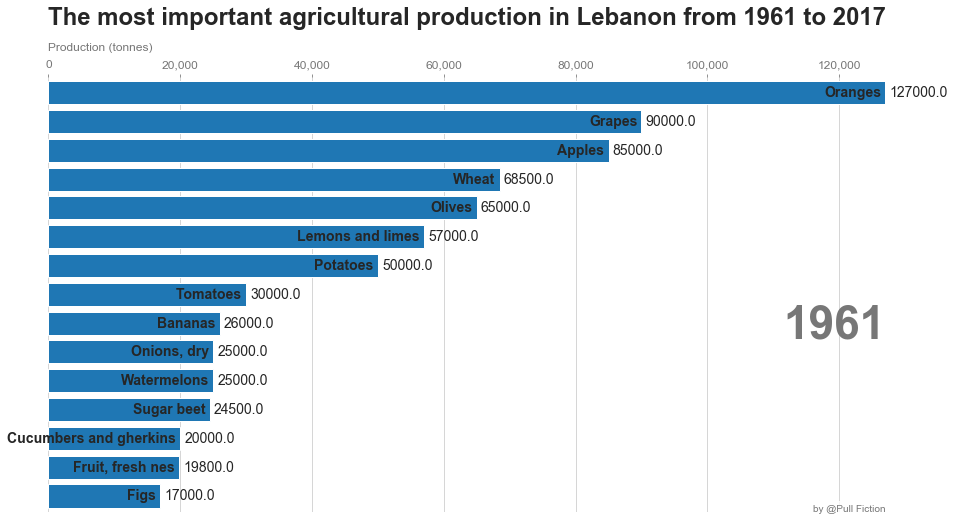

In [212]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1961, 2018),interval = 750)
HTML(animator.to_jshtml()) 
